# PROJECT: CUSTOMER CHURN PREDICTION

The development of the project will utilize the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) methodology, which structures the analysis and modeling into **six well-defined stages**: business understanding, data understanding, data preparation, modeling, evaluation, and deployment. Additionally, results and conclusion stages will be included to finalize the project and demonstrate the potential financial impact. The main goal of this methodology is to develop models through the analysis of business information and data, enabling the prediction of failures and the identification of effective solutions.

## Summary

1. [**Business Understanding**](#business_understanding)  
2. [**Data Understanding**](#data_understanding)  
3. [**Data Preparation**](#data_preparation)  
4. [**Modeling and Evaluation**](#modeling_evaluation)   
5. [**Deployment**](#deployment)  
6. [**Results**](#results)  
7. [**Conclusion**](#conclusion)

---
<a id='business_understanding'></a>
# PHASE 1: BUSINESS UNDERSTANDING

The first phase of the CRISP-DM methodology is **Business Understanding**, where we define the business problem, establish clear goals, and identify success metrics. This phase ensures that the project aligns with the organization's objectives and delivers actionable insights. Establishing a strong business understanding is like building the foundation of a house – absolutely essential.

## 1.1 Business Problem

Telecommunications companies operate in a highly competitive market where customer retention is critical to maintaining profitability. **Customer churn**—the phenomenon where customers switch to a different provider or cancels their subscription—is a significant challenge. Losing customers not only reduces revenue but also increases acquisition costs, as acquiring new customers is more expensive than retaining existing ones.

In this project, the business problem is to **reduce customer churn** by identifying customers who are likely to leave the company. By predicting churn, the company can take proactive measures to retain at-risk customers, such as offering personalized discounts, improving customer service, or tailoring marketing campaigns.


## 1.2 Project Goals

The primary goals of this project are:

1. **Predict Customer Churn:** Develop a machine learning model that accurately predicts whether a customer will churn based on their usage patterns, demographics, and service interactions.

2. **Provide Actionable Insights:** Identify key factors that contribute to churn to help the company address root causes.

3. **Improve Customer Retention:** Enable the marketing and customer service teams to design targeted retention strategies for high-risk customers.

4. **Increase Profitability:** Reduce churn rates, thereby increasing customer lifetime value and overall profitability.


## 1.3 Success Metrics

To measure the success of the project, **technical metrics** (for model performance) and **business metrics** (for organizational impact) will be defined.
  
1. **Technical Metrics:**  
   - **Accuracy:** The primary metric for the Kaggle competition is accuracy, with a target of **at least 85%** on the validation set.  
   - **Precision and Recall:** Given the high cost of missing a churn prediction (false negative), recall for the "churn" class is prioritized, with a target of **at least 80%**.  
   - **F1-Score:** To balance precision and recall, an F1-score of **at least 0.75** for the "churn" class is targeted.  
   - **ROC-AUC:** An ROC-AUC score of **at least 0.85** is aimed for to ensure the model effectively distinguishes between churn and non-churn customers.  

2. **Business Metrics:**  
   - **Churn Rate Reduction:** The goal is to reduce the churn rate by **at least 10%** within six months of model implementation.  
   - **Customer Retention Cost Savings:** Retaining customers is expected to achieve a **15% reduction in customer acquisition costs**.  
   - **Customer Lifetime Value (CLV):** Improved retention strategies aim to increase CLV by **at least 5%**.

## 1.4 Stakeholders

The key stakeholders for this project include:

1. **Marketing Team:** To design targeted retention campaigns.
2. **Customer Service Team:** To improve service quality for at-risk customers.
3. **Data Science Team:** To develop and maintain the predictive model.
4. **Executive Leadership:** To monitor the impact of churn reduction on profitability.


## 1.5 Project Scope

The project will focus on:

- Analyzing historical customer data to identify patterns associated with churn.
- Building a predictive model to classify customers as "churn" or "non-churn."
- Providing actionable insights to stakeholders to reduce churn rates.

The project will not include:
- Real-time deployment of the model (this can be a future phase).
- Direct implementation of retention strategies (this is the responsibility of the marketing and customer service teams).

## 1.6 Business Value

By addressing customer churn, the company can:
- **Increase Revenue:** Retaining customers ensures a steady revenue stream.
- **Reduce Costs:** Lower churn rates reduce the need for expensive customer acquisition campaigns.
- **Enhance Customer Satisfaction:** Proactively addressing customer concerns can improve overall satisfaction and brand loyalty.
- **Gain Competitive Advantage:** A data-driven approach to customer retention can differentiate the company from competitors.

---
<a id='data_understanding'></a>
# PHASE 2: DATA UNDERSTANDING

**Dataset:** This project utilizes a dataset from [Kaggle](https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview), which includes training data for modeling and test data for evaluating the final model in the competition. The training dataset consists of 4,250 samples, each with 19 features and one boolean variable, "churn," indicating the class of each sample.


## 2.1 Dataset Description

- `state`: **string**. 2-letter code of the US state of customer residence
- `account_length`: **numerical**. Number of months the customer has been with the current telco provider
- `area_code`: **string**="area_code_AAA" where AAA = 3 digit area code.
- `international_plan`: **(yes/no)**. The customer has international plan.
- `voice_mail_plan`: **(yes/no)**. The customer has voice mail plan.
- `number_vmail_messages`: **numerical**. Number of voice-mail messages.
- `total_day_minutes`: **numerical**. Total minutes of day calls.
- `total_day_calls`: **numerical**. Total numbers of calls.
- `total_day_charge`: **numerical**. Total charge of day calls.
- `total_eve_minutes`: **numerical**. Total minutes of evening calls.
- `total_eve_calls`: **numerical**. Total number of evening calls.
- `total_eve_charge`: **numerical**. Total charge of evening calls.
- `total_night_minutes`: **numerical**. Total minutes of night calls.
- `total_night_calls`: **numerical**. Total number of night calls.
- `total_night_charge`: **numerical**. Total charge of night calls.
- `total_intl_minutes`: **numerical**. Total minutes of international calls.
- `total_intl_calls`: **numerical**. Total number of international calls.
- `total_intl_charge`: **numerical**. Total charge of international calls
- `number_customer_service_calls`: **numerical**. Number of calls to customer service
- `churn`: **(yes/no)**. Customer churn - TARGET VARIABLE.

## 2.2 Load Data and Packages

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the train dataset
df_train = pd.read_csv('datasets/train.csv')

In [3]:
# First five rows
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## 2.3 Initial Exploration
- Check for missing values, duplicates and data types
- Compute summary statistics for numerical features
- Analyze the distribution of categorical features

In [4]:
# Dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
# Display some informations
print(f'Total Rows: {df_train.shape[0]}')
print(f'Total Columns: {df_train.shape[1]}')
print(f'Numerical Columns: {sum(df_train.dtypes != "object")}')
print(f'Categorical Columns: {sum(df_train.dtypes == "object")}')

Total Rows: 4250
Total Columns: 20
Numerical Columns: 15
Categorical Columns: 5


In [6]:
# Check missing values
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
# Check duplicates
df_train.duplicated().sum()

0

- There are no missing values or duplicated rows in the dataset

In [8]:
# Statistics for numerical features
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Categorical features
df_train.describe(include=['O'])

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


## 2.4 Target Variable Analysis
- Analyze the distribution of the target variable "churn" (class imbalance?).
- Calculate the churn rate (percentage of customers who churned).

In [10]:
# Analyze the distribution of the target variable "churn"
churn = df_train['churn'].value_counts()
print(f'The training dataset contains {churn["yes"]} CHURNED customers and {churn["no"]} NON-CHURNED customer.')

The training dataset contains 598 CHURNED customers and 3652 NON-CHURNED customer.


In [11]:
# Create a function to show the value and the percentage in the graphic below
def value_and_percent(pct, allvals):
    value = round((pct / 100) * np.sum(allvals))
    return f'{value}\n{pct:.2f}%'

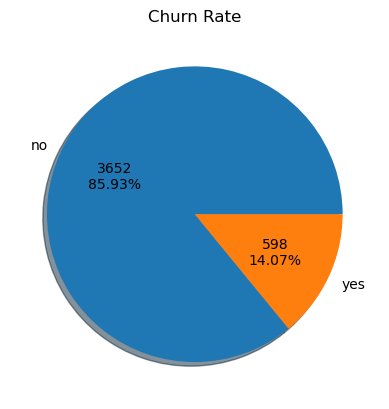

In [12]:
# Analyze the churn rate
plt.pie(x = churn, labels = churn.index, autopct = lambda pct: value_and_percent(pct, churn), shadow=True)
plt.title('Churn Rate')
plt.show()

- The dataset presents an imbalance, with **85.93% classified as "no churn"** and **14.07% as "churn"**, which leads to bias toward the majority class and misleading accuracy metrics. To address this issue, it is advisable to utilize resampling techniques (such as oversampling or undersampling), prioritize precision and recall, adjust class weights, or implement ensemble methods. These strategies will be used if necessary because it can improve the model's effectiveness in predicting churn.

## 2.5 Exploratory Data Analysis (EDA)
- Exploratory Data Analysis (EDA) is a critical step in understanding the dataset, identifying patterns, and generating insights that can guide feature engineering and modeling. Below are well-structured questions to be answered during EDA to gain a deep understanding of the dataset and its relationship with the target variable, "churn."

In [13]:
# First five rows
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### How does "area_code" relate to churn?
- Are there specific area codes with higher churn rates?

In [14]:
# Computes the total and percentage of churn by area code
churn_per_area = df_train.groupby('area_code')['churn'].value_counts().unstack()
churn_per_area[['no %', 'yes %']] = df_train.groupby('area_code')['churn'].value_counts(normalize=True).unstack().round(3) * 100
# The `normalize=True` parameter means that instead of returning the absolute number of occurrences, the function will return the proportion of each value relative to the total.

# Sort and display the results
churn_per_area = churn_per_area.sort_values('no', ascending=False)
churn_per_area

churn,no,yes,no %,yes %
area_code,,,,
area_code_415,1821,287,86.4,13.6
area_code_408,934,152,86.0,14.0
area_code_510,897,159,84.9,15.1


In [15]:
# Creates a function to plot a stacked bar graphic of the total churn with percentages
def stacked_bar_plot_with_percentage(df_churn, title):
    
    churn_count = df_churn[['no', 'yes']]
    churn_rate = df_churn[['no %', 'yes %']]
    
    # Graphic of total churn
    churn_count.plot(kind='bar', stacked=True, figsize=(8, 5))

    plt.title(f'Total Churn by {title}')
    plt.ylabel('Total Churn')
    plt.xlabel(title)
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability  
    plt.legend(title='Churn Status', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

    # Add percentage above each bar  
    for i in range(len(churn_rate)):  
        for j in range(len(churn_rate.columns)):  
            plt.text(i, churn_count.iloc[i].cumsum()[j] - churn_count.iloc[i][j] / 2,  
                     f'{churn_rate.iloc[i][j]:.1f}%', ha='center', va='center')  

    plt.show()

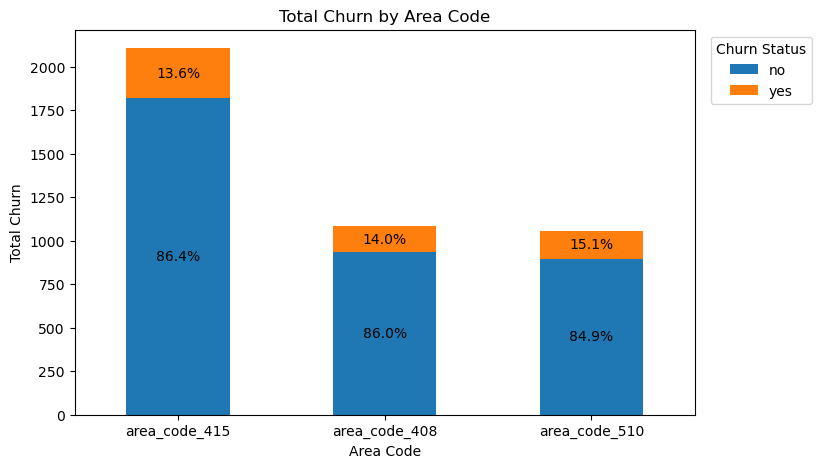

In [16]:
# Call the function to generate a graphic displaying the total churn by area code
stacked_bar_plot_with_percentage(churn_per_area, 'Area Code')

- **No specific area code stands out as having significantly higher churn rates.** 
- **Area code 415 has the highest overall customer count but a churn rate of 13.6%.**
- **Area code 510 has the highest churn rate at 15.1%.** 
- These rates are relatively close, indicating that the differences in churn rates across these area codes are not substantial.

Overall, while area code 510 has the highest percentage of churn, it is not significantly different from the other areas.

### What is the relationship between "voice_mail_plan" and churn?
- Do customers with voice mail plans churn more or less?

In [17]:
# Computes the total and percentage of churn by voice mail plan
churn_per_voice_mail_plan = df_train.groupby('voice_mail_plan')['churn'].value_counts().unstack()
churn_per_voice_mail_plan[['no %', 'yes %']] = df_train.groupby('voice_mail_plan')['churn'].value_counts(normalize=True).unstack().round(3) * 100
churn_per_voice_mail_plan

churn,no,yes,no %,yes %
voice_mail_plan,,,,
no,2622,516,83.6,16.4
yes,1030,82,92.6,7.4


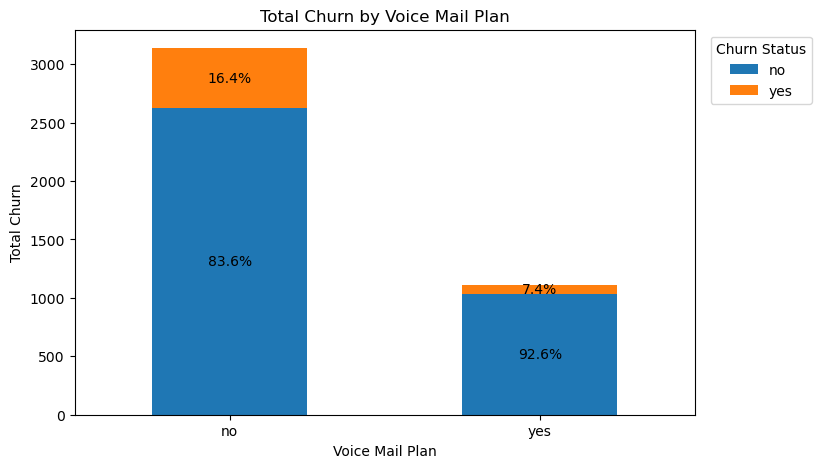

In [18]:
# Call the function to generate a graphic displaying the total churn by voice mail plan
stacked_bar_plot_with_percentage(churn_per_voice_mail_plan, 'Voice Mail Plan')

- Customers **without a voice mail plan** have a **higher churn rate (16.4%)** compared to those with a voice mail plan **(7.4%)**.
- This suggests that the absence of a voice mail plan is associated with a higher likelihood of churn.

However, an important consideration arises:  **Is the observed difference in churn rates statistically significant?** 
- The initial observation indicates that **voice mail plans may play a role in customer retention**. However, statistical testing is needed to confirm whether this difference in churn rates is statistically significant and not due to random variation.

**Hypothesis Testing: Chi-Square Test**  

The **chi-square test** is used to evaluate whether the observed difference in churn rates between customers with and without a voice mail plan is **statistically significant**. This test is particularly suitable for analyzing relationships between **categorical variables** and it works by comparing the **observed frequencies** in the contingency table with the **expected frequencies** under the null hypothesis, providing a statistical basis for evaluating the association between the variables. The expected frequencies are derived from the observed counts in the contingency table, and they represent the counts you would expect if there were no association between the variables (null hypothesis).

- **Requirements for the Chi-Square Test**  

    - To ensure the chi-square test is appropriate, the expected frequencies in each cell of the contingency table must be checked, as the test assumes all expected frequencies are 5 or greater. If any expected frequency is less than 5, the results may not be reliable, and an alternative test, such as Fisher's exact test, should be considered. Low expected frequencies can lead to inaccurate test statistics and p-values, potentially resulting in incorrect conclusions.  

**Test Hypotheses**  
- **Null Hypothesis (H₀):** There is no association between having a voice mail plan and churn (the variables are independent).  

- **Alternative Hypothesis (H₁):** There is an association between having a voice mail plan and churn (the variables are dependent).  

- **Significance Level (α):** 0.05  

In [19]:
# Import scipy libraries
from scipy.stats import chi2_contingency

In [20]:
# Define the contingency table
contingency_table = np.array(churn_per_voice_mail_plan[['no', 'yes']])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("# Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.8f}")
print(f"Degrees of Freedom: {dof}")

print("\n# Expected Frequencies:")
print(expected)

# Interpret the results
print('\n# Intrerpretation of the results:')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between voice mail plan and churn.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between voice mail plan and churn.")

# Chi-Square Test Results:
Chi-Square Statistic: 55.1098
P-value: 0.00000000
Degrees of Freedom: 1

# Expected Frequencies:
[[2696.46494118  441.53505882]
 [ 955.53505882  156.46494118]]

# Intrerpretation of the results:
Reject the null hypothesis: There is a significant association between voice mail plan and churn.


- The chi-square test results (**Chi-Square Statistic = 55.1098, p-value = 0.00000000**) reveal a **statistically significant association** between having a voice mail plan and churn. Specifically, customers with a voice mail plan are **less likely to churn** compared to those without one. This finding suggests that offering voice mail plans could serve as an **effective strategy** for reducing churn rates. The null hypothesis is rejected, confirming a meaningful relationship between voice mail plans and churn.  

- Additionally, all **expected frequencies** in the contingency table are greater than 5, satisfying the assumptions of the chi-square test and ensuring the reliability of the results.

**Calculate Effect Size (Cramer's V)**

- The **Cramer's V** is a measure of effect size that quantifies the strength of the association between voice mail plans and churn.

In [21]:
# Calculate Cramer's V for effect size
n = contingency_table.sum()
cramers_v = np.sqrt(chi2_stat / (n * min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)))
print(f"\nCramer's V (Effect Size): {cramers_v:.4f}")


Cramer's V (Effect Size): 0.1139


- The **Cramer's V value (0.1139)** indicates a **small to moderate association** between the two variables.

While the association is statistically significant, the effect size suggests that the relationship is **not extremely strong**. This means that while voice mail plans are associated with lower churn rates, other factors may also play a significant role in customer retention.

### How does "number_vmail_messages" relate to churn?

- Do customers with more voice mail messages churn less?

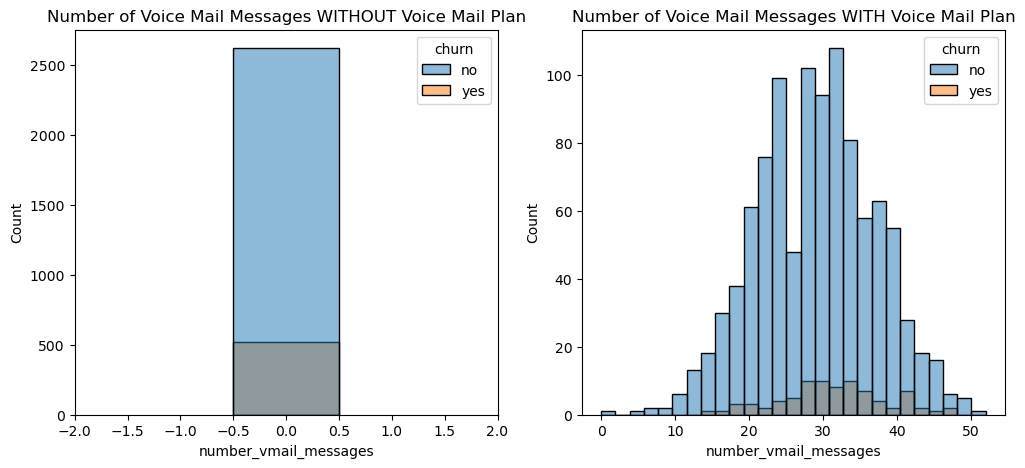

In [22]:
# Plotting a histogram to visualize the Number of Voice Mail Messages With/Without Voice Mail Plan per Churn Status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train[df_train['voice_mail_plan']=='no'], x='number_vmail_messages', hue='churn')
plt.xlim(-2, 2)
plt.title('Number of Voice Mail Messages WITHOUT Voice Mail Plan')

plt.subplot(1, 2, 2)
sns.histplot(data=df_train[df_train['voice_mail_plan']=='yes'], x='number_vmail_messages', hue='churn')
plt.title('Number of Voice Mail Messages WITH Voice Mail Plan')

plt.show()

In [23]:
# Statistical information of number_vmail_messages grouped by churn and voice_mail_plan
df_train.groupby(['voice_mail_plan', 'churn'])['number_vmail_messages'].describe()

count       mean       std   min   25%   50%   75%  \
voice_mail_plan churn                                                        
no              no     2622.0   0.000000  0.000000   0.0   0.0   0.0   0.0   
                yes     516.0   0.000000  0.000000   0.0   0.0   0.0   0.0   
yes             no     1030.0  28.994175  7.899759   0.0  24.0  29.0  34.0   
                yes      82.0  31.353659  7.308665  15.0  27.0  31.0  36.0   

                        max  
voice_mail_plan churn        
no              no      0.0  
                yes     0.0  
yes             no     52.0  
                yes    48.0

The analysis reveals insights into the relationship between the number of voice mail messages and customer churn based on voice mail plan status.

- The **left histogram** showcases **customers without a voice mail plan**, exhibiting **no recorded voice mail messages**. This indicates that those without a voice mail plan **do not utilize this feature at all**.

- Conversely, the **right histogram** illustrates **customers with a voice mail plan** displaying a varied range of voice mail messages, **peaking around 20-30 messages**.

- The statistics show that **churned customers** with a voice mail plan **averaged 31.35 messages**, while **non-churned** customers **averaged lower (approx. 28.99)**. The variability indicates that while some churned customers utilize the service, it might not be enough to prevent their churn.

### How does churn vary by "state"?

- Are there specific states with higher churn rates?

In [24]:
# Group by state and calculate
pct_churn_per_state = df_train.groupby('state')['churn'].agg(
    no_churn_rate = lambda x: (x=='no').mean().round(3)*100,
    churn_rate = lambda x: (x=='yes').mean().round(3)*100,
    total_customers = 'count'
)

# sorting by 'churn_rate'
pct_churn_per_state = pct_churn_per_state.sort_values('churn_rate', ascending=False)

# Visualizing the dataframe
pct_churn_per_state

,no_churn_rate,churn_rate,total_customers
state,,,
NJ,72.9,27.1,96
CA,74.4,25.6,39
WA,77.5,22.5,80
MD,77.9,22.1,86
MT,78.8,21.2,80
OK,79.5,20.5,78
NV,79.5,20.5,83
SC,80.6,19.4,72
TX,80.6,19.4,98


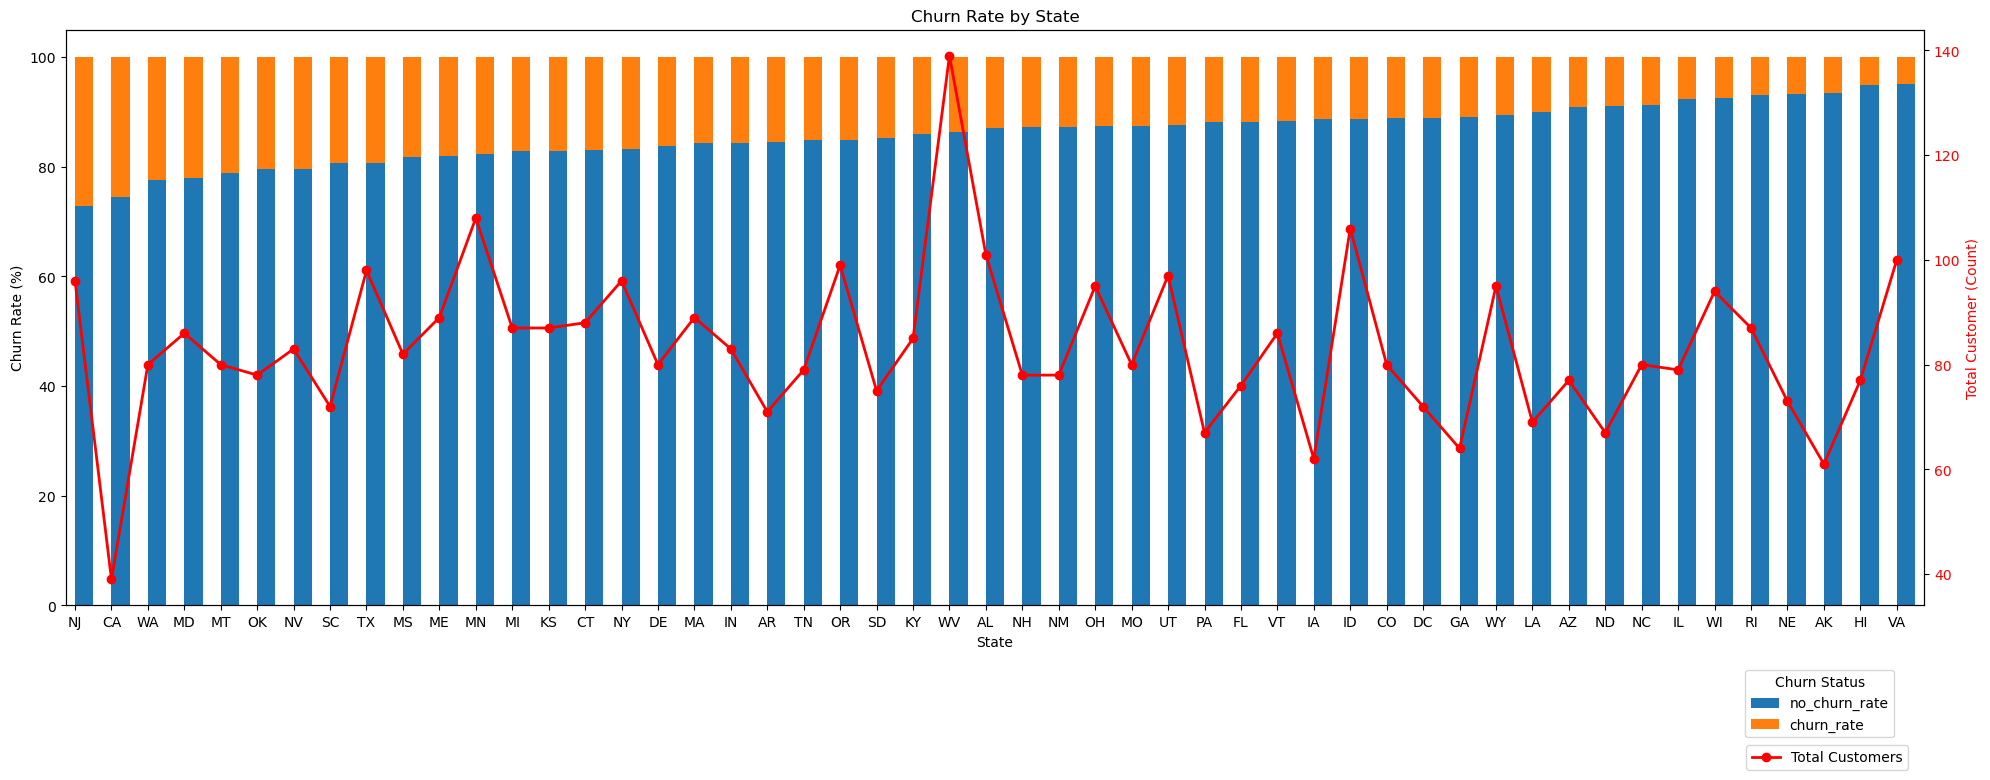

Double click the graphic to zoom in


In [25]:
# Create a figure and axis  
fig, ax1 = plt.subplots(figsize=(20, 8))  

# Plotting the percentage churn per state as a stacked bar chart
pct_churn_per_state[['no_churn_rate', 'churn_rate']].plot(kind='bar', stacked=True, ax=ax1, position=0, color=['#1f77b4', '#ff7f0e'])  

ax1.set_title('Churn Rate by State')  
ax1.set_ylabel('Churn Rate (%)')  
ax1.set_xlabel('State')  
ax1.set_xticks(range(len(pct_churn_per_state.index)))  # Ensure x-ticks align  
ax1.set_xticklabels(pct_churn_per_state.index, rotation=0)  # Rotate x-axis labels for better readability  
ax1.legend(title='Churn Status', bbox_to_anchor=(0.9, -0.6, 0.5, 0.5), loc='upper left')  

# Creating a second axis for total customers per state
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis  

# Plotting total customers per state as a line chart  
ax2.plot(pct_churn_per_state.index, pct_churn_per_state['total_customers'], color='red', marker='o', label='Total Customers', linewidth=2)  
ax2.set_ylabel('Total Customer (Count)', color='red')  
ax2.tick_params(axis='y', labelcolor='red')  # Changing the tick params for better readability  
ax2.legend(loc='upper right', bbox_to_anchor=(0.495, -0.73, 0.5, 0.5))  

# Show the plot  
plt.tight_layout()
plt.show()

print('Double click the graphic to zoom in')

The graphic displays churn rates across different states, highlighting the percentage of churned customers versus non-churned ones, with the total number of customers in each state represented by a red line.

- **Highest Churn Rates**: New Jersey leads with 27.1%, followed by California (25.6%) and Washington (22.5%). These states may require targeted retention efforts due to their relatively high churn rates.
  
- **Lowest Churn Rates**: Virginia exhibits the lowest churn at 5.0%, with Hawaii (5.2%) and Alaska (6.6%) also showing strong retention. Virginia could serve as models for effective customer retention strategies due to a significant total customer (100) and a very low churn rate.

Overall, the analysis suggests a need for differential strategies across states, particularly focusing on those with high churn rates while leveraging the successful practices of states with low churn.

### What is the distribution of "account_length"?

- Are there differences in account length between churned and non-churned customers?

Text(0.5, 1.0, 'Account Length Distribution Per Churn')

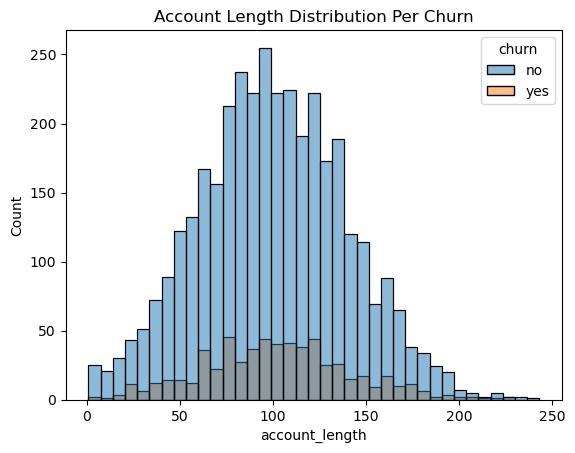

In [26]:
# Plotting a histogram to visualize the distribution of account_length per churn status
sns.histplot(data=df_train, x='account_length', hue='churn')
plt.title('Account Length Distribution Per Churn')

In [27]:
# Statistical information of account_length grouped by churn
df_train.groupby('churn')['account_length'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,99.924973,39.748743,1.0,73.0,99.0,127.0,243.0
yes,598.0,102.137124,39.369162,2.0,76.0,101.0,125.0,225.0


- Non-churned customers have a mean account length of approximately 100 months, while churned customers show a mean of around 102 months. The standard deviations are similar, indicating consistent variability in account lengths.

- The analysis of the histogram and statistical data reveals that both groups display a similar, roughly normal distribution of account lengths centered around 100 months.

Despite the slight difference in means, **the overall data suggests no significant disparity in account length between the two groups.** This implies that account length alone may not be a strong predictor of churn behavior. Further factors may need to be explored to identify the reasons behind customer churn.

### What is the relationship between call minutes and churn?

- Do customers with higher "total_day_minutes", "total_eve_minutes", or "total_night_minutes" churn more?

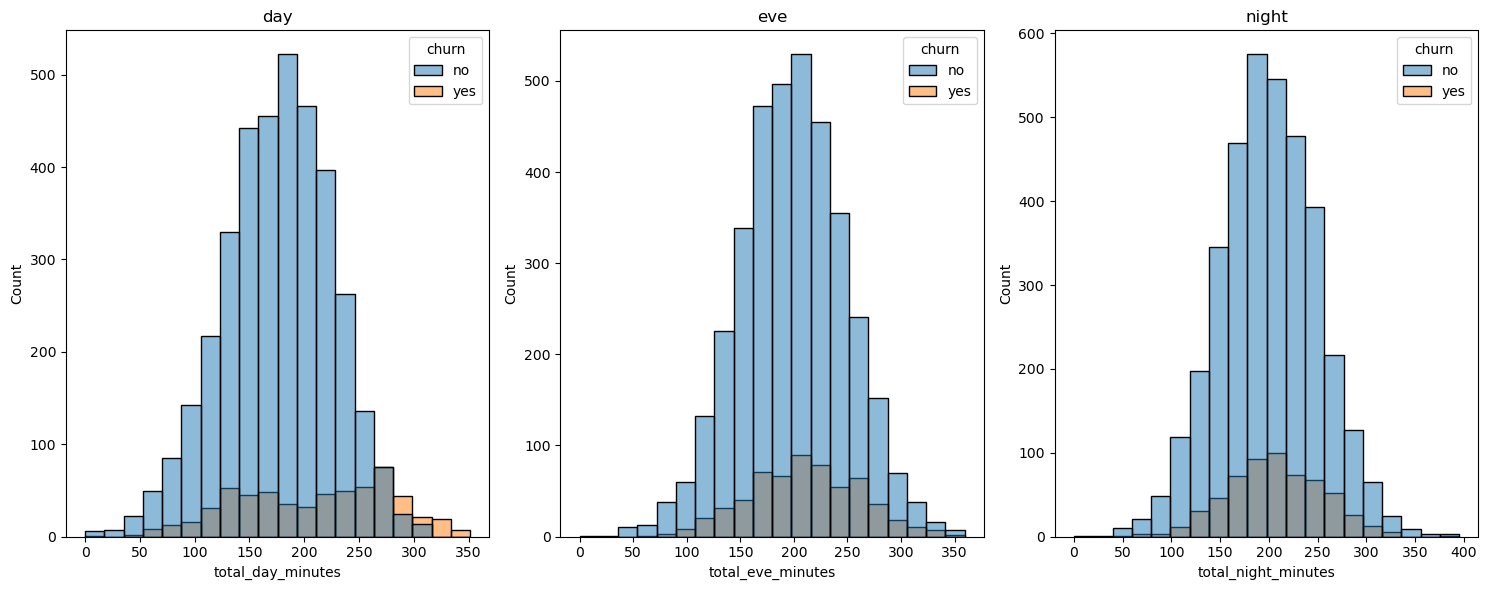

In [28]:
# Plotting a histogram to visualize the distribution of each call minutes per churn status
fig = plt.figure(figsize=(15, 6))

for index, col in enumerate(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']):
    ax = fig.add_subplot(1, 3, index+1)
    ax = sns.histplot(data=df_train, x=col, hue='churn', bins=20)
    ax.set_title(col.split('_')[1])
plt.tight_layout()

In [29]:
# Statistical information of total minutes grouped by churn
df_train.groupby('churn')[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].agg(['mean', 'std']).transpose()

churn                             no         yes
total_day_minutes   mean  175.555093  208.990134
                    std    49.549782   69.183493
total_eve_minutes   mean  198.570674  209.964883
                    std    49.897726   51.312321
total_night_minutes mean  199.577519  206.331773
                    std    50.521152   48.959820

- Customers who churn (orange) tend to use more day minutes on average (208.99 minutes) compared to non-churned customers (175.56 minutes), suggesting that heavier usage during the day is associated with churn.

- Evening and Night minutes present similar trends with roughly normal distribution of minutes centered around 200 minutes, suggesting less variability in usage.

**Customers who use more call minutes during the day are more likely to churn, while night and evening  usage does not show as strong an association.**

### What is the relationship between call charges and churn?

- Do customers with higher "total_day_charge", "total_eve_charge", or "total_night_charge" churn more?

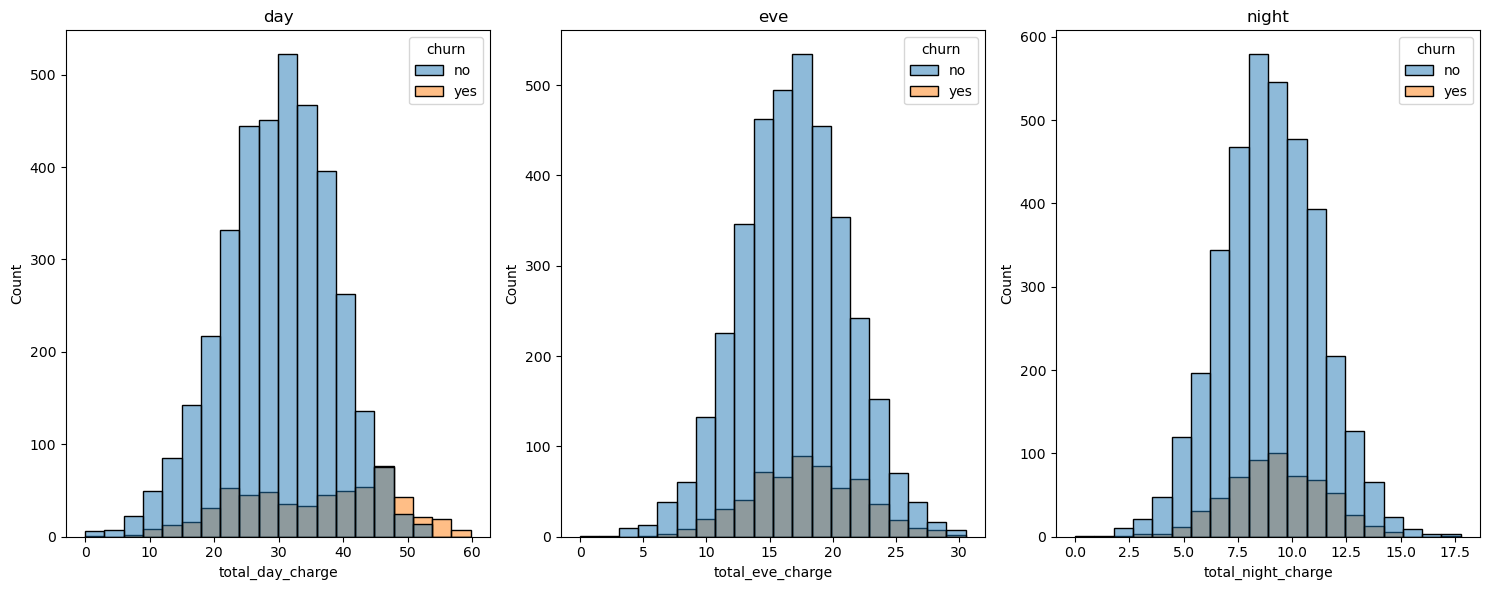

In [30]:
# Plotting a histogram to visualize the distribution of each call charge per churn status
fig = plt.figure(figsize=(15, 6))

for index, col in enumerate(['total_day_charge', 'total_eve_charge', 'total_night_charge']):
    ax = fig.add_subplot(1, 3, index+1)
    ax = sns.histplot(data=df_train, x=col, hue='churn', bins=20)
    ax.set_title(col.split('_')[1])
plt.tight_layout()

In [31]:
# Statistical information of total charge grouped by churn
df_train.groupby('churn')[['total_day_charge', 'total_eve_charge', 'total_night_charge']].agg(['mean', 'std']).transpose()

churn                           no        yes
total_day_charge   mean  29.844948  35.528679
                   std    8.423424  11.761417
total_eve_charge   mean  16.878743  17.847207
                   std    4.241312   4.361545
total_night_charge mean   8.981131   9.285033
                   std    2.273463   2.203215

- Similar to the total minutes, the total charges also exhibit a comparable pattern.**The analysis indicates that churned customers incur higher total day charges compared to non-churned customers, while evening and night charges exhibit less correlation with churn.** This suggests that high spending during the day may be linked to dissatisfaction. Implementing targeted retention strategies for high-spending customers could help mitigate churn risk.

### What is the relationship between total calls and churn?

- Do customers with higher "total_day_calls", "total_eve_calls", or "total_night_calls" churn more?

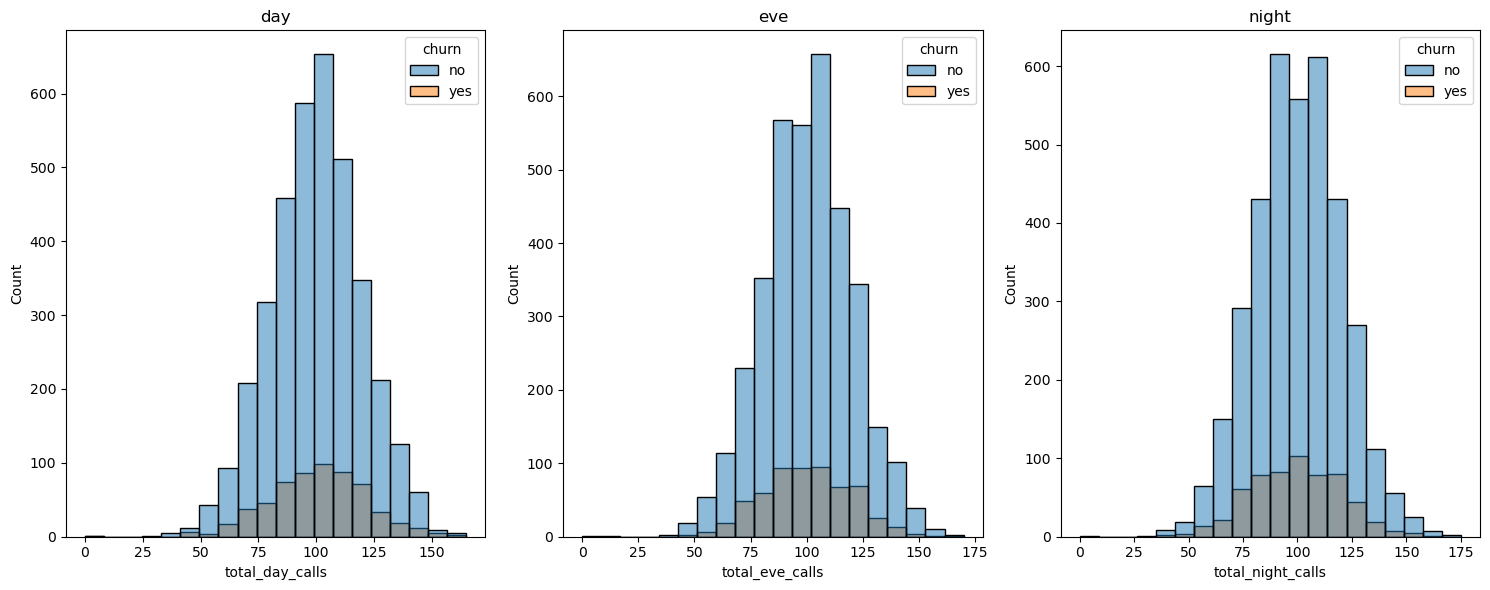

In [32]:
# Plotting a histogram to visualize the distribution of each total call per churn status
fig = plt.figure(figsize=(15, 6))

for index, col in enumerate(['total_day_calls', 'total_eve_calls', 'total_night_calls']):
    ax = fig.add_subplot(1, 3, index+1)
    ax = sns.histplot(data=df_train, x=col, hue='churn', bins=20)
    ax.set_title(col.split('_')[1])
plt.tight_layout()

In [33]:
# Statistical information of total calls grouped by churn
df_train.groupby('churn')[['total_day_calls', 'total_eve_calls', 'total_night_calls']].agg(['mean', 'std']).transpose()

churn                           no         yes
total_day_calls   mean   99.813801  100.478261
                  std    19.659616   20.988919
total_eve_calls   mean  100.231380   99.841137
                  std    19.936117   19.752909
total_night_calls mean   99.942771   99.209030
                  std    20.066126   20.263378

- Based on the graphic and table, the analysis indicates a normal distribution of calls, with a mean of approximately 100 calls across all time periods.

- Furthermore, **there is no significant difference in call distribution between churned and non-churned customers.**

### What is the relationship between "international_plan" and churn?
- Do customers with international plans churn more or less?

In [34]:
# Computes the total and percentage of churn by international plan
churn_per_international_plan = df_train.groupby('international_plan')['churn'].value_counts().unstack()
churn_per_international_plan[['no %', 'yes %']] = df_train.groupby('international_plan')['churn'].value_counts(normalize=True).unstack().round(3) * 100
churn_per_international_plan

churn,no,yes,no %,yes %
international_plan,,,,
no,3423,431,88.8,11.2
yes,229,167,57.8,42.2


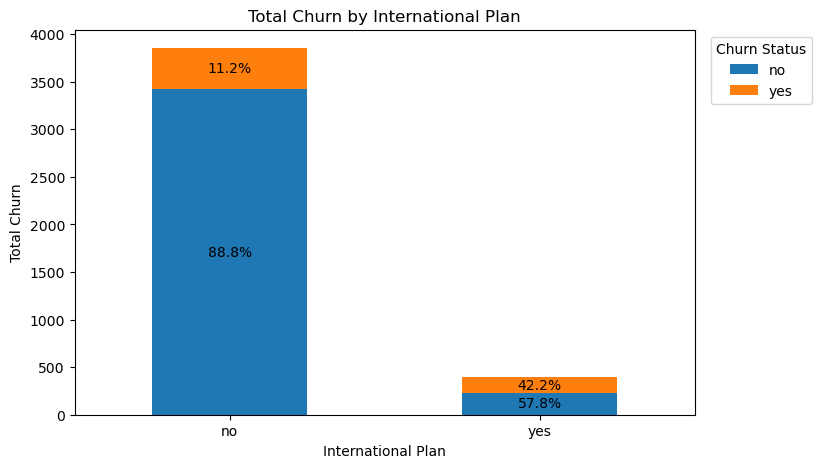

In [35]:
# Call the function to generate a graphic displaying the total churn by international plan
stacked_bar_plot_with_percentage(churn_per_international_plan, 'International Plan')

- **Customers with international plans have a higher churn rate (42.2%) compared to those without international plans (11.2%).**  
- Although the total number of customers with international plans is smaller, they exhibit a significantly higher churn rate.
- In contrast, customers without international plans have a substantial total count and a lower churn rate of 11.2%.
- The higher churn rate among customers with international plans could indicate potential dissatisfaction with the plan's value, pricing, or service quality, or it may reflect a specific demographic or behavioral trend among these customers.

In summary, **customers with international plans do churn more than those without.**


### What is the relationship between international calls and churn, separated by international plan status?

- What is the usage patterns and their impact on churn, for customers with and without international plans?

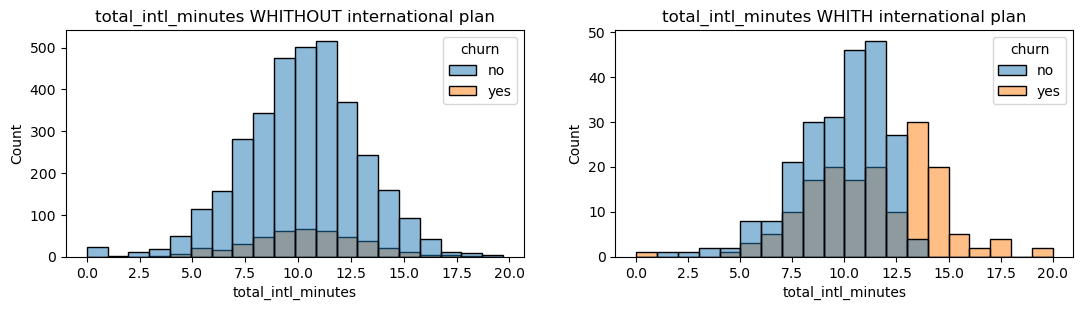

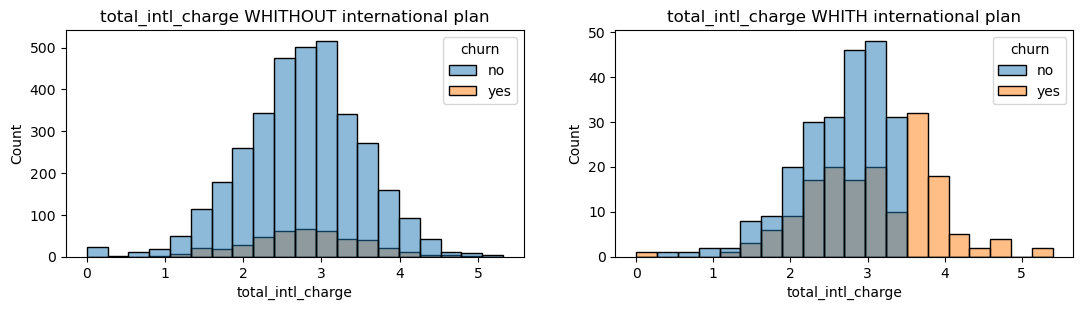

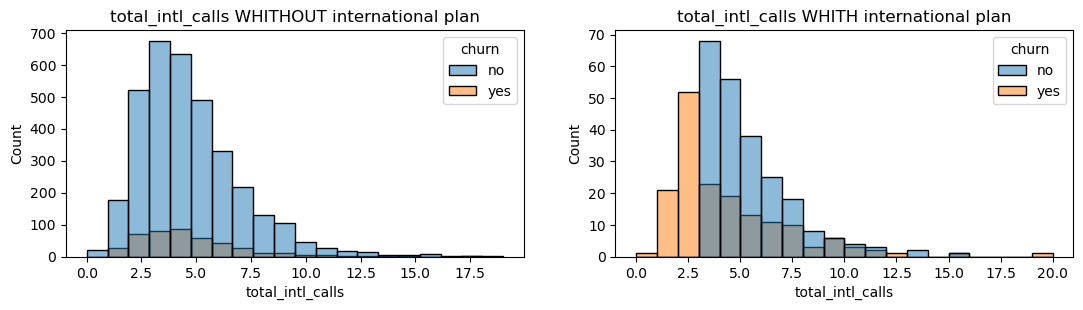

In [36]:
# Plotting a histogram to visualize the distribution of international calls per churn for customers with and without international plans
for col in ['total_intl_minutes', 'total_intl_charge', 'total_intl_calls']:
    
    fig = plt.figure(figsize=(13, 10))
    
    for index in [0, 1]:
        ax = fig.add_subplot(3, 2, index+1)

        if index == 0:
            ax = sns.histplot(data=df_train[df_train['international_plan']=='no'], x=col, hue='churn', bins=20)
            ax.set_title(col + ' WHITHOUT international plan')
        else: 
            ax = sns.histplot(data=df_train[df_train['international_plan']=='yes'], x=col, hue='churn', bins=20)
            ax.set_title(col + ' WHITH international plan')

In [37]:
# Statistical information of international calls per churn for customers with and without international plans
df_train.groupby(['international_plan', 'churn'])[['total_intl_minutes', 'total_intl_charge', 'total_intl_calls']].agg(['mean', 'std']).transpose().unstack()

international_plan         no                                      yes  \
churn                      no                  yes                  no   
                         mean       std       mean       std      mean   
total_intl_minutes  10.222027  2.784468  10.338051  2.630543  9.782096   
total_intl_charge    2.760462  0.751806   2.791833  0.710112  2.641747   
total_intl_calls     4.430032  2.450503   4.348028  2.490818  4.917031   

international_plan                                 
churn                               yes            
                         std       mean       std  
total_intl_minutes  2.131321  11.392216  3.058506  
total_intl_charge   0.575258   3.076228  0.825825  
total_intl_calls    2.122792   3.880240  2.930526

- **Higher Usage and Charges Lead to Churn**: Churned customers, especially those with an international plan, tend to have higher international minutes and charges compared to non-churned customers. This suggests that higher usage and associated costs may be a significant factor in customer churn, possibly due to dissatisfaction with pricing or service quality.

- **Fewer Calls but Longer Duration**: Churned customers with an international plan make fewer calls but incur higher charges and use more minutes. This indicates that they may be making longer, more expensive calls rather than frequent, shorter ones. This highlights the importance of pricing and service quality for customers with international plans.

### Which State is Experiencing More Issues with the International Plan?

- As previously noted, customers with international plans, although fewer in number, exhibit a significantly higher churn rate (42.2%) compared to those without such plans (11.2%). This suggests that customers with international plans are more likely to churn.  
- Given this observation, it is important to identify which state is facing the most challenges related to international plans in order to prioritize improvement efforts.  
- Before proceeding with this analysis, it is crucial to determine the proportion of churned customers with international plans relative to the total number of churned customers. This will help quantify the impact of international plans on overall churn.

In [38]:
# Computes the total and percentage of international plan by churn
international_plan_per_churn = df_train.groupby('churn')['international_plan'].value_counts().unstack()
international_plan_per_churn[['no %', 'yes %']] = df_train.groupby('churn')['international_plan'].value_counts(normalize=True).unstack().round(3) * 100
international_plan_per_churn

international_plan,no,yes,no %,yes %
churn,,,,
no,3423,229,93.7,6.3
yes,431,167,72.1,27.9


In [39]:
total_churn = df_train['churn'].value_counts()['yes']

print('''The company has {} churned customers in total. {} of the churned custumers had an international plan, this means
that approximately {:.1f}% (167 out of 598) of the total churned customers had an international plan.'''
      .format(total_churn, international_plan_per_churn.loc['yes', 'yes'], international_plan_per_churn.loc['yes', 'yes %']))

The company has 598 churned customers in total. 167 of the churned custumers had an international plan, this means
that approximately 27.9% (167 out of 598) of the total churned customers had an international plan.


- The fact that nearly 27.9% of churned customers had an international plan suggests that the plan may not be meeting their expectations or needs. This highlights the importance of conducting a deeper analysis to determine which state is facing the most challenges with international plans to prioritize efforts for better retention in those regions.

In [40]:
# Filter customers with international plans
df_international_plan = df_train[df_train['international_plan'] == 'yes']

In [41]:
# From customer with international plan, group by state
churned_states = df_international_plan.groupby('state')['churn'].agg( # For each state, calculate:
    total_customers='count', # Total customers with international plan
    churned_customers = lambda x: (x == 'yes').sum(), # Total churned customers
    churn_rate = lambda x: (x == 'yes').mean().round(3)*100,  # Churn rate
)

In [42]:
# Calculate the proportion of churned customers with international plans relative to the total number of churned customers per state
churned_states['proportion_of_churn'] = df_train.groupby(['churn', 'state'])['international_plan'].value_counts(normalize=True).unstack().loc['yes', 'yes'].sort_values(ascending=False).round(3)*100

In [43]:
# Sorting and Displaying the data
churned_states = churned_states.sort_values(['churn_rate', 'proportion_of_churn'], ascending=False).fillna(0)
churned_states.head()

,total_customers,churned_customers,churn_rate,proportion_of_churn
state,,,,
ME,6,6,100.0,37.5
NH,6,5,83.3,50.0
AL,6,4,66.7,30.8
IA,3,2,66.7,28.6
NJ,9,6,66.7,23.1


**Interpretation of the Table**  
- It is important to note that the table includes only customers **with an international plan**.  
- The analysis focuses on specific states and their churn rates among customers with international plans.  

**Maine State (ME)**  
- The table indicates that Maine (ME) has **6 customers in total with an international plan**.  
    - All 6 customers have churned, meaning that **100% of customers in ME with an international plan have churned**. This is a significant issue, as it suggests a serious problem with customer retention in this state for customers holding international plans.  
    - Additionally, ME has **16 churned customers in total**. Out of these, 6 have an international plan, which means that approximately **37.5% (6 out of 16) of the total churned customers** in ME have an international plan, indicating a significant impact.  

**New Jersey State (NJ)**  
- The table shows that New Jersey (NJ) has **9 customers in total with an international plan**.  
    - Out of these 9 customers: **3 have not churned (no)** | **6 have churned (yes)**.  
    - The **churn rate** for customers with international plans in NJ is **66.7%**, indicating that more than half of these customers have churned. This is another concerning trend, as it highlights a retention problem among international plan customers in NJ.  
    - NJ has **26 churned customers in total**. Out of these, 6 have an international plan, meaning that approximately **23.1% (proportion_of_churn) of the total churned customers** in NJ have an international plan. While this proportion is lower than in ME, it still indicates a notable impact of international plans on churn in NJ.

In [44]:
# Filter states with churn rate higher or equal than 50%
states_with_international_plan_issues = churned_states[churned_states['churn_rate'] >= 50]
states_with_international_plan_issues

,total_customers,churned_customers,churn_rate,proportion_of_churn
state,,,,
ME,6,6,100.0,37.5
NH,6,5,83.3,50.0
AL,6,4,66.7,30.8
IA,3,2,66.7,28.6
NJ,9,6,66.7,23.1
WA,6,4,66.7,22.2
CA,3,2,66.7,20.0
MA,8,5,62.5,35.7
MD,13,8,61.5,42.1


In [45]:
print('''To prioritize efforts in improving retention rates for international plans, the following regions are experiencing 
significant issues, as their churn rate are 50% or higher:\n{}'''.format(list(states_with_international_plan_issues.index)))

To prioritize efforts in improving retention rates for international plans, the following regions are experiencing 
significant issues, as their churn rate are 50% or higher:
['ME', 'NH', 'AL', 'IA', 'NJ', 'WA', 'CA', 'MA', 'MD', 'GA', 'NV', 'KY', 'TX', 'AR', 'CT', 'KS', 'OK', 'MN', 'TN', 'MI', 'DE', 'NY', 'NM', 'SC']


- **Additional Observations: States with proportion_of_churn higher than 50%**

In [46]:
# States with proportion_of_churn higher than 50%
churned_states[churned_states['proportion_of_churn'] > 50]

,total_customers,churned_customers,churn_rate,proportion_of_churn
state,,,,
IL,13,5,38.5,83.3
VA,8,3,37.5,60.0
NC,11,4,36.4,57.1


- In **IL, VA, and NC**, the percentage of customers with the international plan who churned (`churn_rate`) is lower than 50%, indicating that these states are not experiencing widespread issues with the international plan. However, the percentage of **total churn attributed to customers with the international plan** (`proportion_of_churn`) is higher than 50%, meaning that the international plan has a **significant overall impact on churn** in these states. 

- This suggests that while the international plan may not be causing dissatisfaction across the entire customer base, it is a **critical driver of churn** for a specific subset of customers. In other words, the international plan has the **greatest overall impact on churn** in these states, making it a high-priority issue for targeted interventions.

### How does the number of customer service calls relate to churn?
- Do customers with more service calls churn more?

In [47]:
# Group by the number_customer_service_calls
service_calls_churn = df_train.groupby('number_customer_service_calls')['churn'].agg(
    total_customers='count',
    churned_customers=lambda x: (x == 'yes').sum(),
    churn_rate=lambda x: (x == 'yes').mean().round(3) * 100
).reset_index()

service_calls_churn

,number_customer_service_calls,total_customers,churned_customers,churn_rate
0,0,886,97,10.9
1,1,1524,166,10.9
2,2,947,102,10.8
3,3,558,63,11.3
4,4,209,92,44.0
5,5,81,49,60.5
6,6,28,19,67.9
7,7,13,7,53.8
8,8,2,1,50.0
9,9,2,2,100.0


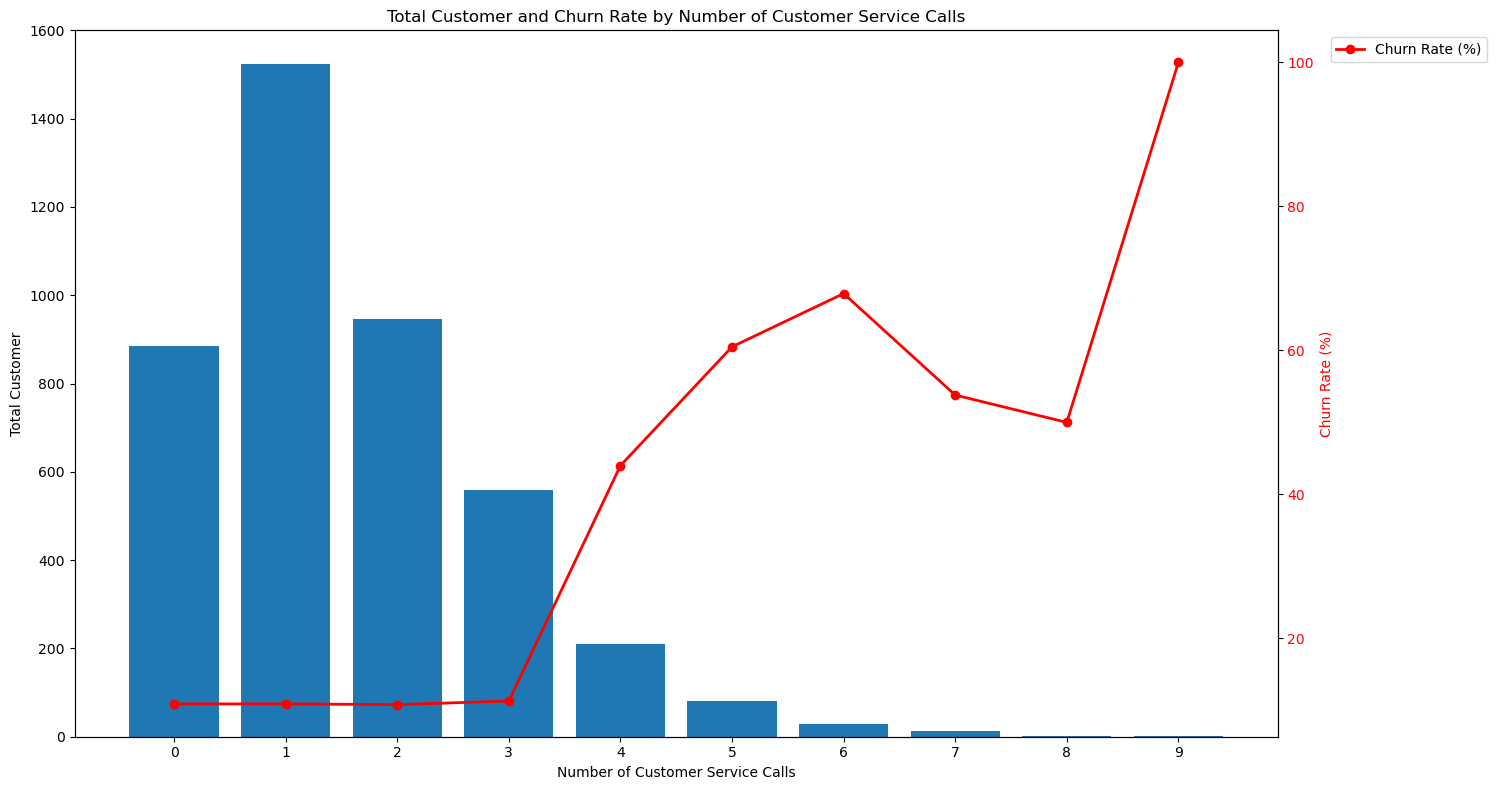

In [48]:
# Create a figure and axis  
fig, ax1 = plt.subplots(figsize=(15, 8))  

# Plotting the total customers per number of customer service calls
ax1.bar(service_calls_churn['number_customer_service_calls'], service_calls_churn['total_customers'])
ax1.set_title('Total Customer and Churn Rate by Number of Customer Service Calls')  
ax1.set_ylabel('Total Customer')  
ax1.set_xlabel('Number of Customer Service Calls')
ax1.set_xticks(service_calls_churn['number_customer_service_calls'])
ax1.set_xticklabels(service_calls_churn['number_customer_service_calls'])

# Creating a second axis for churn rate and plotting churn rate per number of customer service calls as a line chart 
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis  
ax2.plot(service_calls_churn['number_customer_service_calls'], service_calls_churn['churn_rate'], color='red', marker='o', label='Churn Rate (%)', linewidth=2)  
ax2.set_ylabel('Churn Rate (%)', color='red')  
ax2.tick_params(axis='y', labelcolor='red')  # Changing the tick params for better readability  
ax2.legend(loc='upper right', bbox_to_anchor=(1.18, 1))  

# Show the plot  
plt.tight_layout()  # Adjust layout to prevent overlap  
plt.show()

The data analysis reveals a strong correlation between the number of customer service calls and churn rates. **As the number of service calls increases, the percentage of churned customers rises sharply.**

- Customers with **0–3 service calls** have a relatively low churn rate (~10.9%), indicating that most customers in this group are satisfied with the service.

- However, as the number of service calls increases beyond 4, the churn rate rises sharply:
  - **4 calls**: 44.0% churn rate.
  - **5 calls**: 60.5% churn rate.
  - **6+ calls**: Churn rate exceeds 67.9%.
- This suggests that **frequent interactions with customer service are a strong indicator of dissatisfaction**, leading to higher churn rates. 

The rise in churn rates with more calls suggests that identifying and addressing the underlying issues leading to increased service calls is essential for retaining customers and improving overall satisfaction.

### Understanding the problem in high number of service calls

In [49]:
# Divide the dataset into high and low service call groups to analyze their behavior
df_high_service_calls = df_train[df_train['number_customer_service_calls'] >= 4] # Customers with 4 or more service calls.
df_low_service_calls  = df_train[df_train['number_customer_service_calls'] < 4] # Customers with fewer than 4 service calls.

In [50]:
# Calculate churn rates for high and low service call groups
high_churn_rate = df_high_service_calls['churn'].value_counts(normalize=True)['yes']*100
low_churn_rate  = df_low_service_calls['churn'].value_counts(normalize=True)['yes']*100

print(f"Between all customers that had HIGH customer service calls, {high_churn_rate:.1f}% have churned.")
print(f"Between all customers that had LOW customer service calls, {low_churn_rate:.1f}% have churned.")

Between all customers that had HIGH customer service calls, 50.7% have churned.
Between all customers that had LOW customer service calls, 10.9% have churned.


- As expected, customers with **4 or more service calls** have a significantly higher churn rate (50.7%) compared to those with fewer calls (10.9%).

In [51]:
# Calculate the mean values of all features for churned and non-churned customers in both groups.
high_means = df_high_service_calls.groupby('churn').describe().transpose().xs('mean', level=1)
low_means = df_low_service_calls.groupby('churn').describe().transpose().xs('mean', level=1) 

- The purpose of calculating the mean values of all features for churned and non-churned customers in both groups is to identify behavioral patterns that may contribute to churn. By comparing these means and calculating their differences, key discrepancies between the two groups can be highlighted, providing valuable insights into factors that influence customer churn.

In [52]:
# Combine results into a single DataFrame with a MultiIndex for better readability.
data = {    
    ('low_service_call', 'non_churned'): low_means['no'],  
    ('low_service_call', 'churned'): low_means['yes'],  
    ('low_service_call', 'difference_low'): low_means['no'] - low_means['yes'],
    ('high_service_call', 'non_churned'): high_means['no'],  
    ('high_service_call', 'churned'): high_means['yes'],  
    ('high_service_call', 'difference_high'): high_means['no'] - high_means['yes']
}  

# Create MultiIndex DataFrame
df_service_calls_feat = pd.DataFrame(data)
df_service_calls_feat.columns = pd.MultiIndex.from_tuples(data.keys())

# Display the formatted table  
df_service_calls_feat

low_service_call                             \
                                   non_churned     churned difference_low   
account_length                       99.837683  102.154206      -2.316523   
number_vmail_messages                 8.147978    3.467290       4.680688   
total_day_minutes                   174.146946  229.479673     -55.332727   
total_day_calls                      99.850301  100.030374      -0.180073   
total_day_charge                     29.605561   39.011939      -9.406379   
total_eve_minutes                   197.973473  217.942991     -19.969518   
total_eve_calls                     100.110410   99.742991       0.367419   
total_eve_charge                     16.827981   18.525280      -1.697299   
total_night_minutes                 199.550072  210.699299     -11.149227   
total_night_calls                   100.087468   99.677570       0.409898   
total_night_charge                    8.979900    9.481449      -0.501549   
total_intl_minutes                   10.187353   10.829206      -0.641853   
total_intl_calls                      4.455119    4.285047       0.170072   
total_intl_charge                     2.751104    2.924369      -0.173265   
number_customer_service_calls         1.299971    1.306075      -0.006103   

                              high_service_call                              
                                    non_churned     churned difference_high  
account_length                       101.769697  102.094118       -0.324421  
number_vmail_messages                  8.800000    6.394118        2.405882  
total_day_minutes                    205.313939  157.404706       47.909234  
total_day_calls                       99.042424  101.605882       -2.563458  
total_day_charge                      34.904000   26.759059        8.144941  
total_eve_minutes                    211.191515  189.878824       21.312692  
total_eve_calls                      102.787879  100.088235        2.699643  
total_eve_charge                      17.951515   16.140059        1.811456  
total_night_minutes                  200.157576  195.335882        4.821693  
total_night_calls                     96.884848   98.029412       -1.144563  
total_night_charge                     9.007152    8.790529        0.216622  
total_intl_minutes                    10.344242   10.137059        0.207184  
total_intl_calls                       4.575758    4.047059        0.528699  
total_intl_charge                      2.793455    2.737529        0.055925  
number_customer_service_calls          4.436364    4.717647       -0.281283

**Example Analysis: Total Day Minutes**  

1. **Low Service Call Group**:  
   - Non-churned customers have an average usage of **174.14 minutes**.  
   - Churned customers have an average usage of **229.47 minutes**.  
   - The difference is **-55.33 minutes**.  
   - The **negative value** indicates that churned customers have **higher average usage** compared to non-churned customers.  

2. **High Service Call Group**:  
   - Non-churned customers have an average usage of **205.31 minutes**.  
   - Churned customers have an average usage of **157.40 minutes**.  
   - The difference is **+47.90 minutes**.  
   - The **positive value** indicates that churned customers have **lower average usage** compared to non-churned customers.  

To better visualize the key discrepancies between the two groups, a bar chart is provided above. This chart highlights the differences in feature means, making it easier to interpret the trends and patterns.

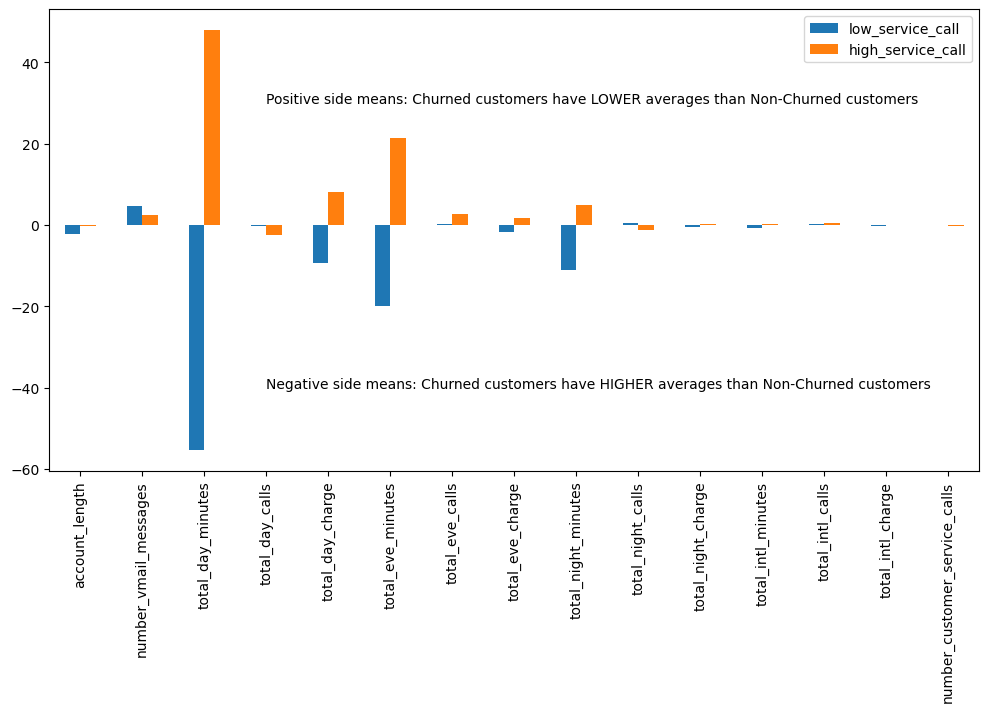

In [53]:
# Plotting a bar chart showing the difference between the averages of churned and non-churned customers for the groups with low and high service calls.
selected_columns = df_service_calls_feat.xs('difference_low', level=1, axis=1).join(df_service_calls_feat.xs('difference_high', level=1, axis=1), rsuffix='_high')
selected_columns.plot(kind='bar', figsize=(12, 6))
plt.text(3, 30, 'Positive side means: Churned customers have LOWER averages than Non-Churned customers')
plt.text(3, -40, 'Negative side means: Churned customers have HIGHER averages than Non-Churned customers')
plt.show()

**Behavior of Customers with High Service Calls (Orange Bars)**
- Churned customers in this group tend to have **lower total minutes and charges** compared to non-churned customers.
- Churned customers make **more calls during the day and night but fewer in the evening**.
- The primary driver of churn in this group is likely **poor customer service experiences**. Customers who need to contact support multiple times may feel their issues are unresolved, leading to frustration and eventual churn.

**Behavior of Customers with Low Service Calls (Blue Bars)**
- Churned customers in this group tend to have **higher total minutes and charges**, particularly during the day and evening.
- Call frequency is similar between churned and non-churned customers, except for slightly fewer night calls among churned customers.
- This suggests that **high-usage customers in this group may be dissatisfied with pricing or service quality**, leading to churn. These customers may not contact support frequently but still feel underserved.

Companies should consider **offering better pricing models or discounts to high-usage customers and improving customer support quality** to reduce churn. Since daytime usage show the most significant differences, efforts should concentrate on enhancing service quality during this period. Daytime is the key period for further analysis of customer behavior.

### Displaying the relationship between number of customer service calls and daytime services

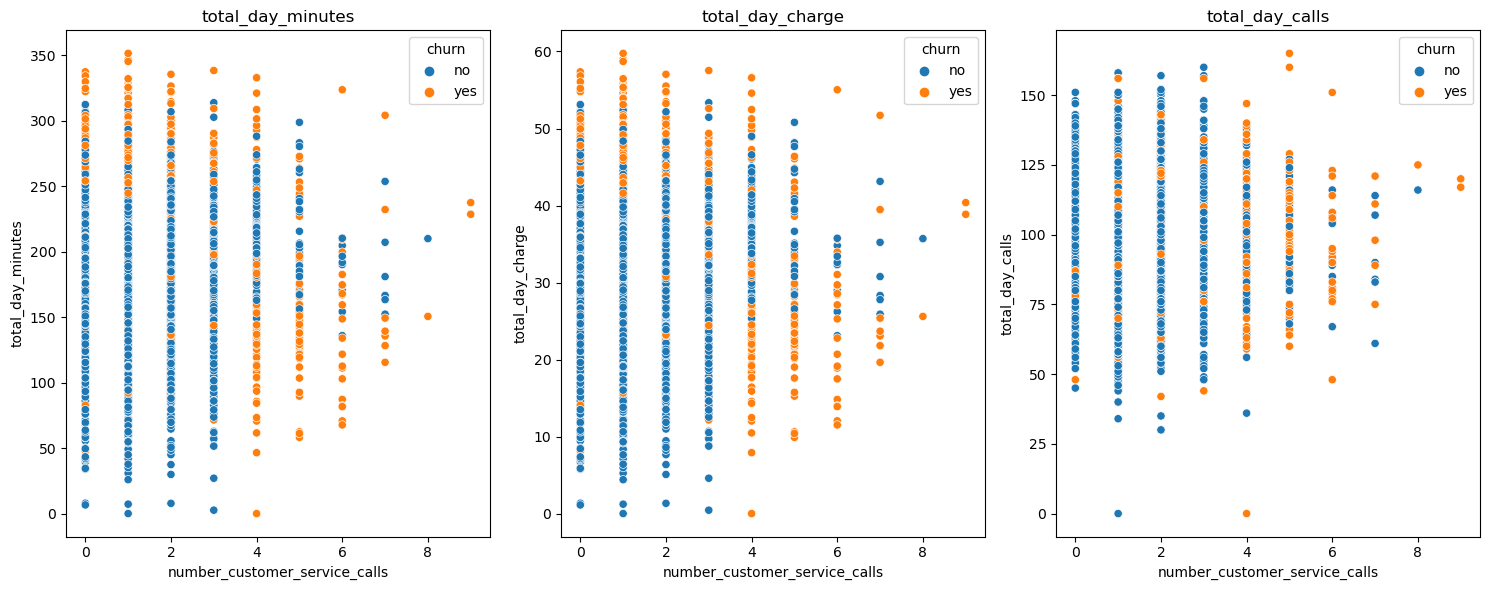

In [54]:
# Plotting a scatterplot to visualize the relationship between number of customer service calls and daytime services
fig = plt.figure(figsize=(15, 6))

for index, col in enumerate(['total_day_minutes', 'total_day_charge', 'total_day_calls']):
    ax = fig.add_subplot(1, 3, index+1)
    ax = sns.scatterplot(data=df_train, x='number_customer_service_calls', y=col, hue='churn')
    ax.set_title(col)
plt.tight_layout()

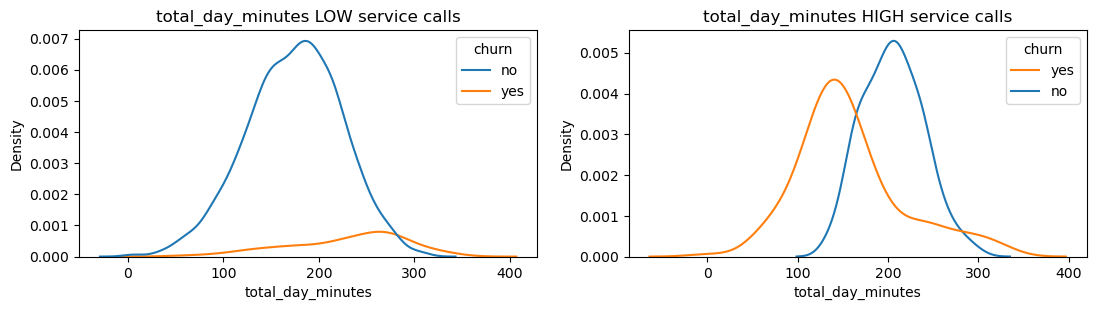

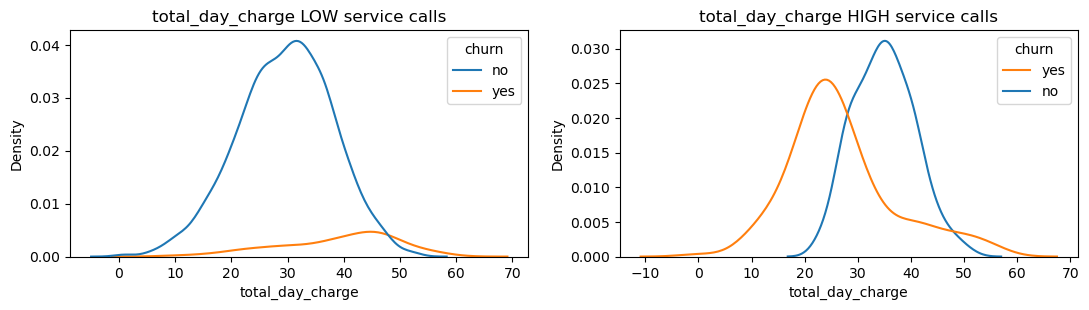

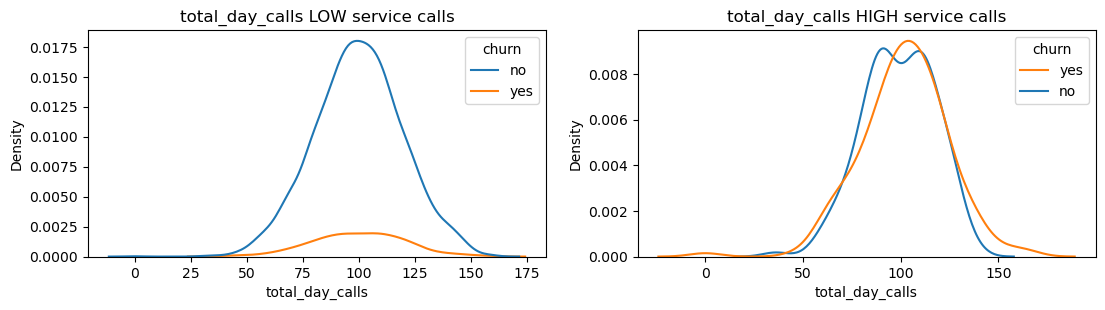

In [55]:
# Define a consistent color palette  
palette = {"yes": "#ff7f0e", "no": "#1f77b4"}

# Plotting a KDE to visualize the distribution of daytime services per churn for customers with LOW and HIGH number 
# of customer service calls
for col in ['total_day_minutes', 'total_day_charge', 'total_day_calls']:
    
    fig = plt.figure(figsize=(13, 10))
    
    for index in [0, 1]:
        ax = fig.add_subplot(3, 2, index+1)

        if index == 0:
            ax = sns.kdeplot(data=df_low_service_calls, x=col, hue='churn', palette=palette)
            ax.set_title(col + ' LOW service calls')
        else: 
            ax = sns.kdeplot(data=df_high_service_calls, x=col, hue='churn', palette=palette)
            ax.set_title(col + ' HIGH service calls')

- The scatterplots and KDE (Kernel Density Estimation) plots provide valuable visual evidence to support the earlier analysis, clearly illustrating the differing behaviors of churned and non-churned customers, especially regarding their daytime usage and number of customer service calls in both low and high service call groups.

### Which State is Experiencing More Issues with the Service Calls and Churn?

- To address this question, it is necessary to analyze the relationship between churn rate and the average service calls made by churned customers. This approach focuses specifically on the behavior of customers who ultimately churned. It provides insights into how customer service interactions may have contributed to their decision to leave.

In [56]:
# Group data by state and calculate metrics
state_service_calls = df_train.groupby('state').agg(
    total_customers=('churn', 'count'), # Total customers per state
    churned_customers=('churn', lambda x: (x == 'yes').sum()), # Churned customers
    churn_rate=('churn', lambda x: (x == 'yes').mean()*100), # Churn rate
    #avg_service_calls_all=('number_customer_service_calls', 'mean') # The average number of customer service calls.
)

In [57]:
# Calculate the average number of service calls made by churned customers in each state.
state_service_calls['avg_service_calls_churn'] = df_train[df_train['churn']=='yes'].groupby('state')['number_customer_service_calls'].mean()

- The `avg_service_calls_churn` metric shows how many service calls churned customers made on average before leaving. This helps identify states with the highest average service calls made by churned customers.

In [58]:
# Calculate a weighted composite score
state_service_calls['composite_score'] = (state_service_calls['churn_rate'] * state_service_calls['avg_service_calls_churn'])

- The **composite score** combines `churn_rate` and `avg_service_calls_churn` into a single metric, making it easier to rank states and focus on the most critical areas. This approach prioritizes states with churned customers who made more service calls and exhibited high churn rates.

In [59]:
# Add a column to indicate the states classified with international plan issues
state_service_calls['international_plan_issues'] = [1 if state in states_with_international_plan_issues.index else 0 for state in state_service_calls.index]

- The `international_plan_issues` were added to our dataframe to provide additional insights into the behavior of churned customers

In [60]:
# Display the dataframe
state_service_calls.head()

,total_customers,churned_customers,churn_rate,avg_service_calls_churn,composite_score,international_plan_issues
state,,,,,,
AK,61,4,6.557377,2.250000,14.754098,0
AL,101,13,12.871287,2.538462,32.673267,1
AR,71,11,15.492958,4.363636,67.605634,1
AZ,77,7,9.090909,1.714286,15.584416,0
CA,39,10,25.641026,1.800000,46.153846,1


- In order to **understand the underlying patterns** and **tailor strategies for different types of states**, the approach of **quadrant analysis** can be used. This method categorizes states into four groups based on predefined thresholds for `avg_service_calls_churn` and `churn_rate`. Each quadrant offers specific insights and actionable recommendations, facilitating the development of targeted strategies to address state-specific issues effectively.

In [61]:
# Define thresholds for churn rate and average service calls to categorize states into quadrants.
churn_rate_threshold = df_train['churn'].value_counts(normalize=True)['yes']*100
avg_service_calls_threshold = df_train.query('churn == "yes"')['number_customer_service_calls'].mean()

print('churn_rate_threshold: ', churn_rate_threshold)
print('avg_service_calls_threshold: ', avg_service_calls_threshold)

churn_rate_threshold:  14.070588235294117
avg_service_calls_threshold:  2.2759197324414715


- Create a scatter plot to visualize the relationship between average service calls and churn rate.
- Add threshold lines to divide the plot into four quadrants for easier interpretation.

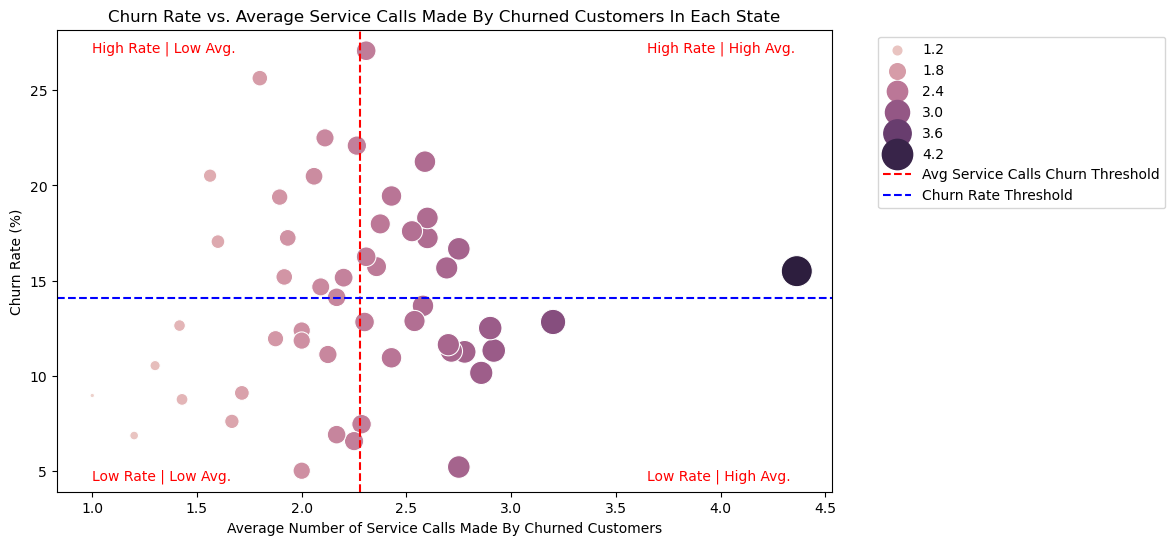

In [62]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_service_calls_churn', 
                y='churn_rate', 
                data=state_service_calls.sort_values('avg_service_calls_churn', ascending=False), 
                hue='avg_service_calls_churn', 
                size='avg_service_calls_churn', 
                sizes=(10, 500))

# Add threshold lines and labels
plt.axvline(x=avg_service_calls_threshold, color='red', linestyle='--', label='Avg Service Calls Churn Threshold')
plt.axhline(y=churn_rate_threshold, color='blue', linestyle='--', label='Churn Rate Threshold')

# Add text to identify each quadrant
plt.text(3.65, 27, 'High Rate | High Avg.', color='red')
plt.text(3.65, 4.5, 'Low Rate | High Avg.', color='red')
plt.text(1.00, 27, 'High Rate | Low Avg.', color='red')
plt.text(1.00, 4.5, 'Low Rate | Low Avg.', color='red')

# Add titles and labels
plt.title('Churn Rate vs. Average Service Calls Made By Churned Customers In Each State')
plt.xlabel('Average Number of Service Calls Made By Churned Customers')
plt.ylabel('Churn Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

By focusing on the **average number of service calls made by churned customers** (`avg_service_calls_churn`), the analysis specifically examines the relationship between **churn rates** and the **service call behavior of customers who left**. This provides deeper insights into the factors directly contributing to churn, eliminating noise from non-churned customers. However, this approach does not consider the **overall service call volume** (`avg_service_calls`), which may limit the ability to identify states where **non-churned customers** drive high service call volumes or where **high service call volumes** are a concern but have not yet led to high churn rates.

**Relationship Between Service Calls and Churn**:
   - The **average number of service calls** for churned customers reflects their **level of engagement with customer support** before leaving.
   - States with **low `avg_service_calls_churn`** indicate that churned customers were **less likely to contact customer service** before leaving. This suggests **silent dissatisfaction or issues unrelated to customer service** (e.g., pricing, international plan, voice mail plan).
   - States with **high `avg_service_calls_churn`** indicate that churned customers were **more likely to contact customer service** before leaving. This suggest that **unresolved issues** or **poor service quality** may have driven their decision to churn.

**Quadrant Analysis:**
   - `hi_rate_hi_avg`: **High churn rate, High service calls**
       - States in this quadrant require urgent action to address unresolved customer service issues (urgent action needed).

   - `hi_rate_lo_avg`: **High churn rate, Low service calls** 
       - States in this quadrant may have issues unrelated to customer service, such as pricing or international plans (investigate non-service-related issues).
       
   - `lo_rate_hi_avg`: **Low churn rate, High service calls** 
       - States here should focus on improving service quality to prevent the churn rate from increasing. (monitor and improve service quality).

   - `lo_rate_lo_avg`: **Low churn rate, Low service calls** 
       - States here are performing well and should maintain their current strategies (maintain performance).

**High Churn Rate & High Average Service Calls (Churned Customers)**

- States with high churn rates (>14%) and high average service calls (>2.27) for churned customers.

In [63]:
# Categorize states into quadrant
hi_rate_hi_avg = state_service_calls[
    (state_service_calls['churn_rate'] > churn_rate_threshold) & 
    (state_service_calls['avg_service_calls_churn'] > avg_service_calls_threshold)
]

# Rank states by their composite score to identify the highest-priority states in this group
hi_rate_hi_avg.sort_values('composite_score', ascending=False)

,total_customers,churned_customers,churn_rate,avg_service_calls_churn,composite_score,international_plan_issues
state,,,,,,
AR,71,11,15.492958,4.363636,67.605634,1
NJ,96,26,27.083333,2.307692,62.500000,1
MT,80,17,21.250000,2.588235,55.000000,0
MS,82,15,18.292683,2.600000,47.560976,0
SC,72,14,19.444444,2.428571,47.222222,1
NY,96,16,16.666667,2.750000,45.833333,1
MI,87,15,17.241379,2.600000,44.827586,1
MN,108,19,17.592593,2.526316,44.444444,1
ME,89,16,17.977528,2.375000,42.696629,1


- **Interpretation:**  
    - Churned customers in these states made **frequent service calls** before leaving, and the overall churn rate is **high**.
    - This indicates that **unresolved customer service issues** or **poor service experiences** are a significant driver of churn.
    
- **Example Scenario:**  
    - A state where customers frequently contact customer service due to recurring issues (e.g., billing errors, technical problems), and many of these customers eventually churn because their issues are not resolved.
    
- **Actionable Insights:**
    - These states should be **top priorities** for intervention.
    - Focus on improving **customer service quality** and **first-call resolution rates**.
    - Proactively reach out to high-risk customers to address their concerns.

**High Churn Rate & Low Average Service Calls (Churned Customers)**

- States with high churn rates (>14%) but low average service calls (≤2.27) for churned customers.

In [64]:
# Categorize states into quadrant
hi_rate_lo_avg = state_service_calls[
    (state_service_calls['churn_rate'] > churn_rate_threshold) & 
    (state_service_calls['avg_service_calls_churn'] <= avg_service_calls_threshold)
]

# Rank states by their composite score to identify the highest-priority states in this group
hi_rate_lo_avg.sort_values('composite_score', ascending=False)

,total_customers,churned_customers,churn_rate,avg_service_calls_churn,composite_score,international_plan_issues
state,,,,,,
MD,86,19,22.093023,2.263158,50.000000,1
WA,80,18,22.500000,2.111111,47.500000,1
CA,39,10,25.641026,1.800000,46.153846,1
NV,83,17,20.481928,2.058824,42.168675,1
TX,98,19,19.387755,1.894737,36.734694,1
KS,87,15,17.241379,1.933333,33.333333,1
OR,99,15,15.151515,2.200000,33.333333,0
OK,78,16,20.512821,1.562500,32.051282,1
SD,75,11,14.666667,2.090909,30.666667,0


- **Interpretation:**  
    - Churned customers in these states made **few service calls** before leaving, but the overall churn rate is **high**, indicating **silent dissatisfaction** or **issues unrelated to customer service**.
    - This suggests that churn is driven by **factors other than customer service issues** (pricing, international plan, competitor offerings).
    
- **Example Scenario:**  
    - A state where customers are generally satisfied with customer service but leave due to **external factors** (e.g., better offers from competitors).
    
- **Actionable Insights:**  
    - Investigate **non-service-related drivers of churn** to understand why customers are leaving without contacting support.
    - Conduct surveys or interviews with churned customers to understand their reasons for leaving.

**Low Churn Rate & High Average Service Calls (Churned Customers)**
 
- States with low churn rates (≤14%) but high average service calls (>2.27) for churned customers.

In [65]:
# Categorize states into quadrant
lo_rate_hi_avg = state_service_calls[
    (state_service_calls['churn_rate'] <= churn_rate_threshold) & 
    (state_service_calls['avg_service_calls_churn'] > avg_service_calls_threshold)
]

# Rank states by their composite score to identify the highest-priority states in this group
lo_rate_hi_avg.sort_values('composite_score', ascending=False)

,total_customers,churned_customers,churn_rate,avg_service_calls_churn,composite_score,international_plan_issues
state,,,,,,
NH,78,10,12.820513,3.200000,41.025641,1
MO,80,10,12.500000,2.900000,36.250000,0
WV,139,19,13.669065,2.578947,35.251799,0
ID,106,12,11.320755,2.916667,33.018868,0
AL,101,13,12.871287,2.538462,32.673267,1
VT,86,10,11.627907,2.700000,31.395349,0
CO,80,9,11.250000,2.777778,31.250000,0
IA,62,7,11.290323,2.714286,30.645161,1
NM,78,10,12.820513,2.300000,29.487179,1


- **Interpretation:**  
    - Churned customers in these states made **frequent service calls** before leaving, but the overall churn rate is **low**.
    - This indicates that **most customers are retained**, but a small group of dissatisfied customers made multiple service calls before churning.
    
- **Example Scenario:**  
    - A state where most customers are satisfied, but a small group of customers face severe issues and make multiple service calls before churning.
    
- **Actionable Insights:**  
    - Investigate the root causes of the high service call volume among churned customers.
    - Improve **issue resolution processes** to prevent churn among dissatisfied customers.

**Low Churn Rate & Low Average Service Calls (Churned Customers)**

- States with low churn rates (≤14%) and low average service calls (≤2.27) for churned customers.

In [66]:
# Categorize states into quadrant
lo_rate_lo_avg = state_service_calls[
    (state_service_calls['churn_rate'] <= churn_rate_threshold) & 
    (state_service_calls['avg_service_calls_churn'] <= avg_service_calls_threshold)
]

# Rank states by their composite score to identify the highest-priority states in this group
lo_rate_lo_avg.sort_values('composite_score', ascending=False)

,total_customers,churned_customers,churn_rate,avg_service_calls_churn,composite_score,international_plan_issues
state,,,,,,
UT,97,12,12.371134,2.000000,24.742268,0
FL,76,9,11.842105,2.000000,23.684211,0
DC,72,8,11.111111,2.125000,23.611111,0
PA,67,8,11.940299,1.875000,22.388060,0
OH,95,12,12.631579,1.416667,17.894737,0
AZ,77,7,9.090909,1.714286,15.584416,0
RI,87,6,6.896552,2.166667,14.942529,0
AK,61,4,6.557377,2.250000,14.754098,0
WY,95,10,10.526316,1.300000,13.684211,0


- **Interpretation:**  
    - Churned customers made **few service calls** before leaving, and the overall churn rate is **low**.
    - This suggests that customers are **generally satisfied**, and churn is driven by **other factors** (e.g., pricing, competition).
    
- **Example Scenario:**  
    - A state where customers are highly satisfied with the service and rarely contact customer service, but a small number of customers leave due to external factors.
    
- **Actionable Insights:**  
    - Investigate **non-service-related drivers of churn** (e.g., pricing, network quality, competition).
    - Maintain **high service quality** to prevent future issues.

--- 
<a id='data_preparation'></a>
# PHASE 3: Data Preparation

- Data Preparation involves cleaning, transforming, and organizing the raw dataset to make it suitable for modeling. This step includes handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and validation sets to ensure the model is trained on high-quality, representative data.

## 3.1 Feature Engineering
- Feature Engineering involves creating new features from existing data to improve model performance, such as combining call minutes across different times of day. This step enhances the dataset's predictive power by capturing additional patterns and relationships.

### Calculate the total of minutes, charges and calls across all times of day

In [67]:
# Calculate the total minutes, charges and calls across all times of day
df_train['total_minutes'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes']
df_train['total_charge'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge']
df_train['total_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls']

In [68]:
# Drop the columns
df_train = df_train.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 
                        'total_day_charge', 'total_eve_charge', 'total_night_charge', 
                        'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1)

In [69]:
# Display the dataframe
df_train.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_charge,total_calls
0,OH,107,area_code_415,no,yes,26,13.7,3,3.70,1,no,611.5,55.54,329
1,NJ,137,area_code_415,no,no,0,12.2,5,3.29,0,no,527.2,59.00,328


### Classify the States

- The "State" column has many unique values (51 states), and one option to convert this categorical column into numerical format would be to use `pd.get_dummies()`. However, this would lead to dimensionality issues.  

- To address this, we will classify the states based on the previously performed grouping, which uses the relationship between churn rates and the average number of customer service calls.

In [70]:
# Define a function to classify the state based on its group.
def state_class(state):
    if state in lo_rate_lo_avg.index:
        return 0
    elif state in lo_rate_hi_avg.index:
        return 1
    elif state in hi_rate_lo_avg.index:
        return 2
    else: #hi_rate_hi_avg
        return 3 

In [71]:
# Call the function and return the classification in a new column
df_train['state_class'] = df_train['state'].apply(state_class)

- Since a new column is available that classifies each state, the categorical column 'state' can be removed. This avoids the need to transform this categorical column into a sparse matrix of zeros and ones.  

- A sparse matrix is a matrix in which most elements are zero. This often occurs in high-dimensionality contexts, where the amount of available data is large, but much of it is irrelevant or redundant. Sparsity can negatively impact machine learning models in several ways, such as complicating data representation and requiring specialized algorithms to handle sparse data. Additionally, it can lead to overfitting, where the model learns noise and irrelevant features from the dataset, reducing its ability to generalize effectively.

In [72]:
# Drop the column 'state'
df_train.drop('state', axis=1, inplace=True)

## 3.2 Encode Categorical Variables

- Encode categorical variables ("international_plan", "voice_mail_plan", "churn") into numerical formats using **one-hot encoding with pd.get_dummies()**, creating binary columns for each category to ensure **no ordinal relationship is implied**.

- Since these are **nominal qualitative variables (no inherent order between values)**, one-hot encoding is the appropriate method to preserve their categorical nature without introducing unintended ordinal bias.

In [73]:
# Display the dataframe
df_train.head(3)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_charge,total_calls,state_class
0,107,area_code_415,no,yes,26,13.7,3,3.70,1,no,611.5,55.54,329,0
1,137,area_code_415,no,no,0,12.2,5,3.29,0,no,527.2,59.00,328,3
2,84,area_code_408,yes,no,0,6.6,7,1.78,2,no,558.2,65.02,248,0


In [74]:
# Encode categorical variables into numerical formats 
df_train = pd.get_dummies(data=df_train, dtype='int32', columns=['area_code', 'international_plan', 'voice_mail_plan', 'churn'], drop_first=True)

In [75]:
# Display the dataframe
df_train.head(3)

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_charge,total_calls,state_class,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,107,26,13.7,3,3.70,1,611.5,55.54,329,0,1,0,0,1,0
1,137,0,12.2,5,3.29,0,527.2,59.00,328,3,1,0,0,0,0
2,84,0,6.6,7,1.78,2,558.2,65.02,248,0,0,0,1,0,0


## 3.3 Feature Selection

- Feature Selection involves identifying and retaining the most relevant variables for the model while discarding irrelevant, redundant, or noisy features. This process improves model performance, reduces overfitting, and enhances interpretability by focusing on the most impactful predictors.

In [76]:
# Import the RandomForestClassifier to get the features importances
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Split into train and test
X_importance = df_train.drop('churn_yes', axis=1)
y_importance = df_train['churn_yes']

In [78]:
 # Create an instance of the model
selector = RandomForestClassifier(random_state=0)

In [79]:
# Fit the model to the training data
selector.fit(X_importance, y_importance)

RandomForestClassifier(random_state=0)

In [80]:
# Display the score of each features
columns_score = pd.Series(selector.feature_importances_, selector.feature_names_in_).sort_values(ascending=False)
columns_score

total_charge                     0.302344
total_minutes                    0.133895
number_customer_service_calls    0.125938
international_plan_yes           0.088557
total_intl_calls                 0.059739
total_intl_charge                0.054722
total_intl_minutes               0.052305
number_vmail_messages            0.046590
account_length                   0.042332
total_calls                      0.038141
voice_mail_plan_yes              0.023739
state_class                      0.020164
area_code_area_code_415          0.006050
area_code_area_code_510          0.005485
dtype: float64

In [81]:
# Filter scores higher or equal than 0.04
features_selected = []

print('---BEST FEATURES---\n')

for feature, score in columns_score.items():
    if score >= 0.04:
        print(f'{feature}: {score*100:.1f}%')
        features_selected.append(feature)

---BEST FEATURES---

total_charge: 30.2%
total_minutes: 13.4%
number_customer_service_calls: 12.6%
international_plan_yes: 8.9%
total_intl_calls: 6.0%
total_intl_charge: 5.5%
total_intl_minutes: 5.2%
number_vmail_messages: 4.7%
account_length: 4.2%


In [82]:
# Select the best features
X_selected = df_train[features_selected]
X_selected.head()

,total_charge,total_minutes,number_customer_service_calls,international_plan_yes,total_intl_calls,total_intl_charge,total_intl_minutes,number_vmail_messages,account_length
0,55.54,611.5,1,0,3,3.70,13.7,26,107
1,59.00,527.2,0,0,5,3.29,12.2,0,137
2,65.02,558.2,2,1,7,1.78,6.6,0,84
3,49.36,501.9,3,1,3,2.73,10.1,0,75
4,76.28,779.3,3,0,7,2.03,7.5,24,121


## 3.4 Standardize Numerical Features

- The data are on different scales, which can affect the performance of some algorithms. Standardizing Numerical Features involves scaling numerical variables to have a mean of zero and a standard deviation of one. This ensures that distance-based algorithms, such as SVM, KNN, or logistic regression, treat all features equally, improving model performance and convergence.

In [83]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [84]:
# Create an instance of the scaler
scaler = StandardScaler()

In [85]:
# Fit and transform the data
X_scaled = scaler.fit_transform(X_selected)

In [86]:
# Transform the scaled data into a data frame
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

In [87]:
# Display the scaled data
X_scaled.head()

,total_charge,total_minutes,number_customer_service_calls,international_plan_yes,total_intl_calls,total_intl_charge,total_intl_minutes,number_vmail_messages,account_length
0,-0.110674,0.343852,-0.426346,-0.320547,-0.579164,1.248591,1.247901,1.366857,0.170399
1,0.224178,-0.605331,-1.188960,-0.320547,0.232927,0.698342,0.704379,-0.567911,0.926186
2,0.806780,-0.256284,0.336268,3.119667,1.045017,-1.328187,-1.324770,-0.567911,-0.409038
3,-0.708761,-0.890199,1.098882,3.119667,-0.579164,-0.053219,-0.056552,-0.567911,-0.635774
4,1.896499,2.233211,1.098882,-0.320547,1.045017,-0.992669,-0.998657,1.218029,0.523099


In [88]:
# Statistical information
X_scaled.describe().round(2)

,total_charge,total_minutes,number_customer_service_calls,international_plan_yes,total_intl_calls,total_intl_charge,total_intl_minutes,number_vmail_messages,account_length
count,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00,4250.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.55,-3.44,-1.19,-0.32,-1.80,-3.72,-3.72,-0.57,-2.50
25%,-0.69,-0.67,-0.43,-0.32,-0.58,-0.63,-0.64,-0.57,-0.69
50%,-0.00,0.00,-0.43,-0.32,-0.17,0.01,0.02,-0.57,-0.01
75%,0.65,0.67,0.34,-0.32,0.64,0.63,0.63,0.62,0.67
max,3.47,3.33,5.67,3.12,6.32,3.53,3.53,3.30,3.60


## 3.5 Split the Data Into Training and Validation

- Split the dataset into training and validation sets (70% training | 30% validation).

In [89]:
# Import Libraries
from sklearn.model_selection import train_test_split

In [90]:
# Split the data into Features and Target
X = X_scaled
y = df_train['churn_yes']

In [91]:
# Display the Features
X.head(2)

,total_charge,total_minutes,number_customer_service_calls,international_plan_yes,total_intl_calls,total_intl_charge,total_intl_minutes,number_vmail_messages,account_length
0,-0.110674,0.343852,-0.426346,-0.320547,-0.579164,1.248591,1.247901,1.366857,0.170399
1,0.224178,-0.605331,-1.188960,-0.320547,0.232927,0.698342,0.704379,-0.567911,0.926186


In [92]:
# Shape of the features
X.shape

(4250, 9)

In [93]:
# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=df_train['churn_yes'])

--- 
<a id='modeling_evaluation'></a>
# PHASE 4: MODELING AND EVALUATION

- Modeling involves building and training machine learning models to predict churn using the prepared dataset. This phase focuses on selecting appropriate algorithms, tuning hyperparameters, and evaluating model performance to identify the best predictive solution.

In [94]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

## 4.1 Initialize Models

- Initialize a variety of machine learning models to compare their performance

In [95]:
# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
}

## 4.2 Train and Evaluate Models

- Train each model, evaluate its performance, and store the results

In [96]:
# Dictionary to store model performance
results = {}

# Loop through each model
for name, model in models.items():
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]  # Predicted probabilities for ROC-AUC
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Print the results, classification report and confusion matrix
    print(f'Model: {name}\n')
    
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1)
    print('ROC-AUC: ', roc_auc)
    
    print('')
    print(classification_report(y_val, y_pred))
    print('')
    print(pd.crosstab(y_val, y_pred, rownames=['valor_real'], colnames=['valor predito']))
    print("\n" + "="*60 + "\n") 

Model: Logistic Regression

Accuracy:  0.8705882352941177
Precision:  0.6
Recall:  0.2346368715083799
F1 Score:  0.3373493975903614
ROC-AUC:  0.8322493169677446

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1096
           1       0.60      0.23      0.34       179

    accuracy                           0.87      1275
   macro avg       0.74      0.60      0.63      1275
weighted avg       0.85      0.87      0.85      1275


valor predito     0   1
valor_real             
0              1068  28
1               137  42


Model: KNN

Accuracy:  0.9294117647058824
Precision:  0.8869565217391304
Recall:  0.5698324022346368
F1 Score:  0.6938775510204082
ROC-AUC:  0.9078849447457489

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1096
           1       0.89      0.57      0.69       179

    accuracy                           0.93      1275
   macro avg       0.91      0.78

## 4.3 Compare Model Performance

- Compare the performance of all models

In [97]:
# Convert results to a DataFrame for easy comparison
df_results = pd.DataFrame(results).T
df_results

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.870588,0.600000,0.234637,0.337349,0.832249
KNN,0.929412,0.886957,0.569832,0.693878,0.907885
Decision Tree,0.955294,0.838889,0.843575,0.841226,0.908558
Random Forest,0.980392,0.987342,0.871508,0.925816,0.933300


- The **Random Forest** model demonstrated the best performance among the evaluated algorithms. The next step involves **hyperparameter tuning** to identify the optimal parameters for this model, enhancing their predictive performance. Additionally, **cross-validation** will be performed to ensure a robust evaluation, validating the model's reliability and generalizability to unseen data. This process helps mitigate overfitting and ensures consistent performance across different datasets.

## 4.4 Hyperparameter Tuning 

- **Hyperparameter tuning** with **GridSearchCV** systematically tests a range of parameter combinations to identify the optimal configuration for a model. It evaluates each combination using cross-validation, ensuring robust performance and reducing overfitting. This process enhances model accuracy and generalizability for reliable predictions.

### Random Forest

In [98]:
# Define the parameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [99]:
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='recall')

In [100]:
# Fit the model
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [101]:
# Print the best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Recall Score:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Recall Score: 0.8329317269076306


## 4.5 Final Model Training

- Train the final model with the best hyperparameters

In [102]:
# Initialize the final model with the best parameters
final_model = grid_search_rf.best_estimator_

# Train the final model
final_model.fit(X_train, y_train)

# Predict using the final model
y_pred_final = final_model.predict(X_val)

# Get predicted probabilities for the positive class (churn)
y_pred_proba_final = final_model.predict_proba(X_val)[:, 1]

# Calculate evaluation metrics
accuracy_final = accuracy_score(y_val, y_pred_final)
precision_final = precision_score(y_val, y_pred_final)
recall_final = recall_score(y_val, y_pred_final)
f1_final = f1_score(y_val, y_pred_final)
roc_auc_final = roc_auc_score(y_val, y_pred_proba_final)

# Evaluate the final model
print("--------------- Final Model Evaluation --------------\n")

print(f'Model: {final_model}\n')

print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1-Score: {f1_final:.4f}")
print(f"ROC-AUC Score: {roc_auc_final:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_final))

# Confusion matrix
conf_matrix = pd.crosstab(y_val, y_pred_final, rownames=['real_value'], colnames=['predict_value'])
print("\nConfusion Matrix:")
print(conf_matrix)

--------------- Final Model Evaluation --------------

Model: RandomForestClassifier(n_estimators=300, random_state=0)

Accuracy: 0.9804
Precision: 0.9873
Recall: 0.8715
F1-Score: 0.9258
ROC-AUC Score: 0.9322

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1096
           1       0.99      0.87      0.93       179

    accuracy                           0.98      1275
   macro avg       0.98      0.93      0.96      1275
weighted avg       0.98      0.98      0.98      1275


Confusion Matrix:
predict_value     0    1
real_value              
0              1094    2
1                23  156


--- 
<a id='deployment'></a>
# PHASE 5: DEPLOYMENT

- Deploy the model, preprocess the test data, make predictions and submit to Kaggle

## 5.1 Save the Final Model

- Save the final model for deployment

In [103]:
# Import Library
import joblib

In [104]:
# Save the model to a file
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

## 5.2  Preprocess Test Data

- Load the test dataset and apply the same preprocessing steps as used for the training data.

In [105]:
# Load the test dataset
df_test = pd.read_csv('datasets/test.csv')

In [106]:
# Display the test data
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [107]:
# Test dataset information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### Create a function to preprocess the test dataset

- Apply the same preprocessing steps used on the training data (e.g., encoding, scaling, feature engineering)

In [108]:
def preprocess_data(df_test):
    
    # Calculate the total minutes, charges and calls across all times of day
    df_test['total_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
    df_test['total_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']
    df_test['total_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']

    # Drop the columns
    df_test = df_test.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 
                            'total_day_charge', 'total_eve_charge', 'total_night_charge', 
                            'total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1)

    # Drop the column 'state'
    df_test.drop('state', axis=1, inplace=True)
    
    # Encode categorical variables into numerical formats 
    df_test = pd.get_dummies(data=df_test, dtype='int32', columns=['area_code', 'international_plan', 'voice_mail_plan'], drop_first=True)
    
    # Select the best features
    X_selected = df_test[features_selected]

    # Transform the data
    X_scaled = scaler.transform(X_selected)

    # Transform the scaled data into a data frame
    X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

    # Return the data test preprocessed
    return X_scaled

### Preprocess the Test Data

In [109]:
# Apply the preprocess function
X_test = preprocess_data(df_test)

## 5.3 Load the Final Model and Make Predictions on Test Data

- Use the final model to predict churn on the preprocessed test data.

In [110]:
# Load the final model
final_model = joblib.load('final_model.pkl')
final_model

RandomForestClassifier(n_estimators=300, random_state=0)

In [111]:
# Predict churn using the best model
test_predictions = final_model.predict(X_test)

## 5.4 Submit Predictions to Kaggle

- Format the predictions as required by Kaggle and submit them to get the final score. Click here to submit > [Kaggle](https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview)

In [112]:
# Add the predictions to the test dataframe
df_test['churn'] = test_predictions

In [113]:
# Convert to categorical values
df_test['churn'] = df_test['churn'].map({1: 'yes', 0: 'no'})

In [114]:
# Format predictions for submission
submission = df_test[['id', 'churn']]
submission.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [115]:
# Save to CSV
submission.to_csv('submission.csv', index=False)

---
<a id='results'></a>
# PHASE 6: RESULTS  

At the beginning of this project, **customer churn** was identified as a critical challenge in the telecommunications industry. In a highly competitive market, losing customers not only impacts revenue but also increases acquisition costs, as retaining existing customers is far more cost-effective than acquiring new ones. The business problem focused on **reducing churn** by proactively identifying at-risk customers and implementing targeted retention strategies.  

To address this challenge, a **machine learning model** was developed to predict customer churn based on usage patterns, demographics, and service interactions. The goals were clear: **predict churn accurately**, provide **actionable insights** into the root causes of churn, and enable the marketing and customer service teams to design **effective retention strategies**. By doing so, the aim was to **reduce churn rates**, **increase customer lifetime value**, and ultimately **improve profitability**.  

The results of the analysis and model implementation are presented below, detailing the **quantitative and qualitative outcomes**, including model performance metrics, key insights into churn drivers, and the potential business impact of the findings. These results demonstrate how the predictive model and actionable insights can help the company achieve its goals of **reducing churn** and **enhancing customer retention**.

## 6.1 Final Model and Kaggle Competition Score

The final **Random Forest model** demonstrated exceptional performance, achieving an **accuracy of 98.04%** on the validation set and **Kaggle competition scores of 96.952% (private) and 98.222% (public)**. 

The **public score** is based on predictions evaluated against approximately **30% of the test data** (public leaderboard), while the **private score** is calculated using the remaining **70% of hidden test data** (private leaderboard). The private score determines the final ranking, ensuring models generalize well and are not overfitted to the public data.

While the Kaggle competition score is not the primary goal of the project, it serves as a valuable benchmark to validate the model's reliability and generalizability to unseen data. The main objective is to develop a machine learning model that accurately predicts churn and provides actionable insights into its root causes. To assess whether the success metrics were achieved, the model's performance on the validation dataset will be compared against predefined benchmarks.

## 6.2 Model Performance Metrics

In [116]:
# Compare to success metrics
sucess_metrics = {
    'Expected': {'Accuracy': 0.85, 'Recall': 0.80, 'F1-Score': 0.75, 'ROC-AUC': 0.85}, # Expected Metrics
    'Real':{'Accuracy': accuracy_final, 'Recall': recall_final, 'F1-Score': f1_final, 'ROC-AUC': roc_auc_final} # Real Metrics
}

# Convert results to a DataFrame for easy comparison
df_sucess_metrics = pd.DataFrame(sucess_metrics).round(4)*100
df_sucess_metrics['Status'] = df_sucess_metrics.apply(lambda row: 'Achieved' if row['Real'] > row['Expected'] else 'NOT Achieved', axis=1)

# Display the results
print("SUCCESS METRICS COMPARISON: ")
df_sucess_metrics

SUCCESS METRICS COMPARISON: 


,Expected,Real,Status
Accuracy,85.0,98.04,Achieved
Recall,80.0,87.15,Achieved
F1-Score,75.0,92.58,Achieved
ROC-AUC,85.0,93.22,Achieved


### Success Metrics vs. Model Performance Metrics

Below is a comparison of the **success metrics** established during the business understanding phase with the **real metrics** achieved by the model:

1. **Accuracy:**
    - The model achieved an **accuracy of 98.04%** on the validation set, significantly surpassing the target. This result is further validated by the **Kaggle competition scores of 96.952% (private) and 98.222% (public)**, confirming the model's strong generalization to unseen data.

2. **Recall:**
    - The recall of **87.15% for the "churn" class** indicates that the model successfully identified 87.15% of all customers who were likely to churn, surpassing the target. This is critical for **minimizing false negatives**, as failing to recognize at-risk customers could result in lost revenue.

3. **F1-Score:**
    - The **F1-score of 92.58%** balances precision and recall, demonstrating the model's robustness in handling imbalanced data and outperforming the target by **17.58 percentage points**.

4. **ROC-AUC:**
    - The **ROC-AUC score of 93.22%** shows that the model has excellent discriminatory power, effectively separating churn and non-churn customers, exceeding the target by **8.22 percentage points**.

The final model not only met but **exceeded all predefined success metrics**, demonstrating its effectiveness in accurately predicting customer churn. The high performance across **accuracy, recall, F1-score, and ROC-AUC** confirms the model's reliability and robustness.

### Confusion Matrix and Classification Report

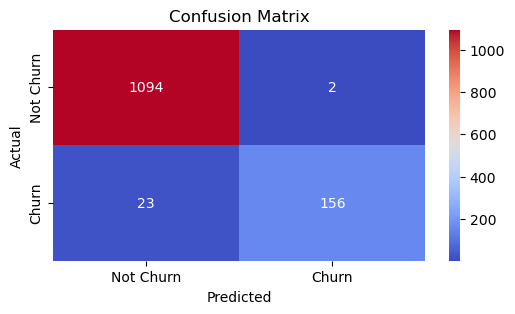


------------------Classification Report------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1096
           1       0.99      0.87      0.93       179

    accuracy                           0.98      1275
   macro avg       0.98      0.93      0.96      1275
weighted avg       0.98      0.98      0.98      1275



In [117]:
# Create a heatmap for the confusion matrix to better interpret the results
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix , annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\n------------------Classification Report------------------\n")
print(classification_report(y_val, y_pred_final))

When evaluating the success metrics of the model, it is crucial to align them with the specific business problem at hand. In this case, customer churn is a significant concern because losing customers directly impacts revenue, and acquiring new customers is far more expensive than retaining existing ones. Therefore, the choice of which metric to prioritize depends on the potential impact of prediction errors on the business. Two types of errors are particularly important: false positives and false negatives. 

A false positive occurs when the model predicts that a customer will churn, but in reality, they do not. This type of error can lead to unnecessary efforts, such as offering discounts or retention campaigns to customers who are not at risk, thereby increasing operational costs. To minimize false positives, the focus should be on improving **precision**, which measures the ratio of true positives to the total predicted positives. In this project, the model achieved an impressive **precision of 99%**, correctly identifying 156 out of 158 predicted churn cases. This high precision ensures that resources are not wasted on customers who are unlikely to leave.

On the other hand, a false negative occurs when the model predicts that a customer will not churn, but in reality, they do. This type of error is particularly problematic because it results in losing customers without any retention efforts, directly affecting revenue and profitability. To minimize false negatives, the focus should be on improving **recall**, which measures the ratio of true positives to the total actual positives. The model achieved a **recall of 87%**, correctly identifying 156 out of 179 actual churn cases. Given the high cost of losing customers, reducing false negatives is critical, which is why recall was prioritized during model optimization. When executing **GridSearchCV**, the parameter `scoring='recall'` was used to ensure the model maximizes the identification of at-risk customers.

The **confusion matrix** provides further insight into the model's performance. It shows that the model correctly predicted **1094 out of 1096 non-churn customers** and **156 out of 179 churn customers**, with only **2 false positives** and **23 false negatives**. This demonstrates the model's ability to accurately classify both churn and non-churn cases. Additionally, the **classification report** highlights a **precision of 99%** and a **recall of 87%**, indicating a strong balance between minimizing false positives and false negatives.

In conclusion, while both precision and recall are important, **recall** is prioritized in this project due to the high cost associated with false negatives. The model's strong performance in recall (87%) ensures that most at-risk customers are identified, enabling proactive retention efforts. At the same time, the high precision (99%) minimizes unnecessary costs associated with false positives. This balance makes the model highly effective for addressing the business problem of reducing churn and improving customer retention, ultimately contributing to increased revenue and profitability.

## 6.3 Feature Analysis

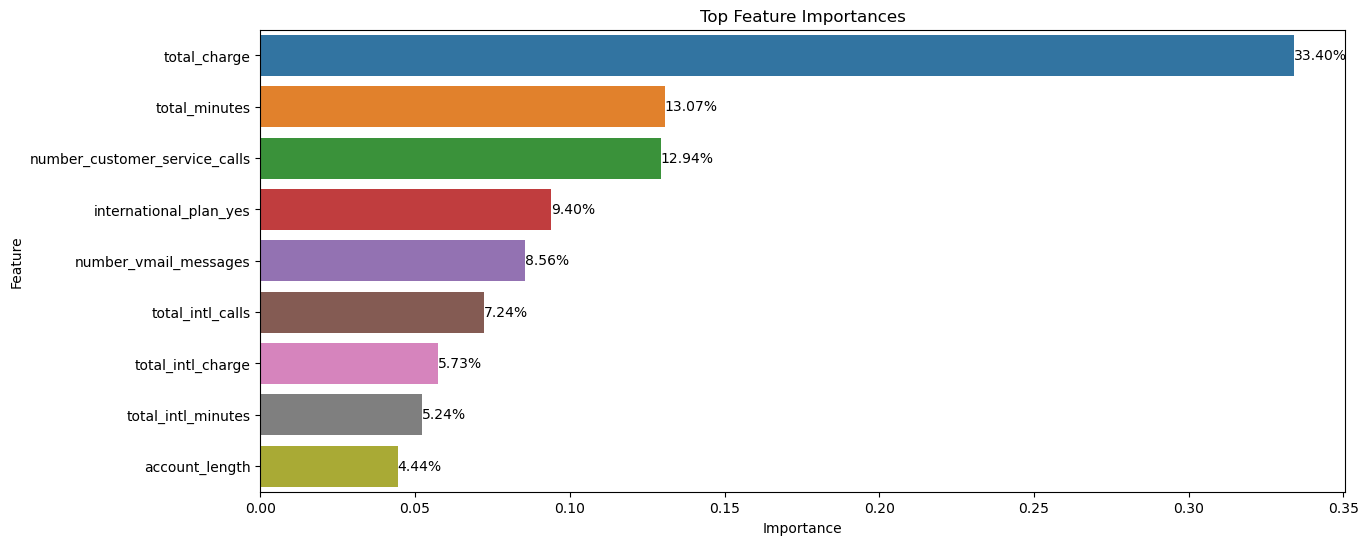

In [118]:
# Get feature importances
if hasattr(final_model, 'feature_importances_'):
    feature_importances = final_model.feature_importances_
    feature_names = X.columns
    
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, )
    plt.title('Top Feature Importances')
        
    # Add the feature importance value on top of each bar  
    for index, value in enumerate(importance_df['Importance']):  
        plt.text(value, index, f'{value*100:.2f}%', va='center')  
    
    plt.show()

The analysis of the top features driving churn predictions reveals critical insights into customer behavior and dissatisfaction. The most influential feature is **Total Charge (33.4%)**, which indicates that high total charges, particularly during the day, are a significant predictor of churn. This suggests that pricing plays a crucial role in customer retention, and customers may be sensitive to high costs associated with their usage.

The second most important feature is **Total Minutes (13.1%)**, highlighting that customers with high usage are more likely to churn. This could be due to dissatisfaction with service quality or pricing, as customers who use the service extensively may have higher expectations that, if unmet, lead to churn.

The **Number of Customer Service Calls (12.9%)** is another strong predictor of churn. The analysis shows a clear correlation between the number of service calls and churn rates, with churn rates increasing as the number of calls rises. This suggests that frequent interactions with customer service are often a sign of unresolved issues, leading to customer dissatisfaction and eventual churn. Additionally, the combination of high service calls with lower total minutes and charges among churned customers indicates a pattern where dissatisfied customers may reduce their usage before leaving. Conversely, in the low service calls group, churned customers tend to have higher total minutes and charges, particularly during the day and evening, suggesting different churn triggers for this segment.

The **International Plan (9.4%)** is also a significant factor, with customers having international plans showing a churn rate of 42.2%. This high churn rate indicates potential dissatisfaction with the plan's value, pricing, or service quality, emphasizing the need for better international service offerings.

Finally, the combined features of **International Calls, Charges, and Minutes (18.2%)** further underscore the importance of international service quality. Churned customers with international plans tend to have higher international minutes and charges but make fewer calls, indicating they may be making longer, more expensive calls rather than frequent, shorter ones. This behavior suggests that these customers may be dissatisfied with the cost or quality of international services, leading to churn.

In summary, the analysis highlights that **pricing, service quality, and international service offerings** are key drivers of churn. Addressing these areas through targeted strategies, such as competitive pricing, improved service resolution, and enhanced international plans, can help reduce churn rates and improve customer retention.

**Key Insights into Churn Drivers:**
   - **Pricing Sensitivity:** High total charges and international charges are significant churn drivers, indicating that customers are sensitive to pricing. Offering competitive pricing or personalized discounts could help retain at-risk customers.
   - **Service Quality:** Frequent customer service calls and high usage (total minutes) suggest that unresolved issues and poor service quality contribute to churn. Improving first-call resolution and service reliability can reduce churn.
   - **International Services:** Customers with international plans or high international usage are more likely to churn, highlighting the need for better international service offerings and support.

**Actionable Recommendations:**
   - **Proactive Retention Campaigns:** Use the model to identify high-risk customers and offer personalized discounts, loyalty rewards, or tailored service improvements.
   - **Service Quality Improvements:** Address common issues reported in customer service calls to reduce dissatisfaction and prevent churn.
   - **Pricing Optimization:** Review pricing strategies, especially for international plans and high-usage customers, to ensure competitiveness and fairness.
   - **Targeted Marketing:** Design marketing campaigns to address the specific needs of at-risk customer segments, such as those with international plans or high service call volumes.

## 6.4 Business Impact
The model's performance aligns with the project's goals and success metrics, providing significant business value:

1. **Churn Rate Reduction:**  
   With a recall of 87.15%, the model can identify the majority of at-risk customers, enabling the company to implement targeted retention strategies. This is expected to contribute to the goal of reducing the churn rate by **at least 10%** within six months.

2. **Customer Retention Cost Savings:**  
   By retaining customers who would have otherwise churned, the company can save on customer acquisition costs. The model's high precision ensures that retention efforts are focused on the right customers, contributing to the target of a **15% reduction in customer acquisition costs**.

3. **Customer Lifetime Value (CLV):**  
   Retaining customers through targeted interventions is expected to increase CLV by **at least 5%**, as loyal customers tend to generate more revenue over time.

4. **Revenue Protection:**  
   The model's ability to accurately predict churn helps protect the company's revenue stream. For example, if the company has 4250 customers and a churn rate of 14%, approximately 595 customers are at risk of churning. With the model's recall of 87.15%, the company can potentially retain 518 of these customers, significantly reducing revenue loss.

5. **Competitive Advantage:**  
   By leveraging a data-driven approach to customer retention, the company can differentiate itself from competitors, enhancing its market position and brand loyalty.

## 6.5 Potential Financial Impact  

The company has 4,250 customers, and with a current churn rate of 14.07%, about 598 customers are at risk of leaving. The model's **recall of 87.15%** enables the company to correctly identify **521 churned customers**. By implementing targeted retention strategies, these customers can potentially be retained, significantly reducing revenue loss. 

As mentioned earlier, the goal is to reduce the churn rate by **at least 10% of the current churn rate**, equivalent to a 1.407 percentage point reduction. This would lower the churn rate to 12.63%, directly enhancing revenue retention and profitability.

### Assumptions

1. **Total Customers:** Assume the company has **4,250 customers**
2. **Current Churn Rate:** Assume the current churn rate is **14.07%**.
3. **Reduction in Churn Rate:** The goal is to reduce churn by **10% of the current churn rate**.
4. **Average Revenue per Customer (ARPU):** Assume the average monthly revenue per customer is **\$50/month**.
5. **Customer Lifetime Value (CLV):** Assume the average customer lifetime is 24 months, giving a CLV of **1,200** (50/month × 24 months).
6. **Customer Acquisition Cost (CAC):** Assume the cost to acquire a new customer is **$300** per customer.

### **Applying the Model's Performance to Reduce Churn**

To illustrate the potential impact, the churn rate reduction will be evaluated for **10%, 20%, 30%, and 40% reductions**

This analysis will demonstrate the financial benefits of reducing churn at varying levels, providing a clear understanding of the model's potential impact on the company's profitability.

In [119]:
# Define Assumptions
total_customers = 4250          # Total Number of Customers
current_churn_rate = 0.1407     # Current Churn Rate (14.07%)
arpu = 50                       # Average Revenue per Customer per Month (ARPU)
customer_lifetime = 24          # Average Customer Lifetime in Months
clv = arpu * customer_lifetime  # Customer Lifetime Value (CLV) ($1,200)
cac = 300                       # Customer Acquisition Cost (CAC)

# Current Values
current_churned_customers = round(total_customers * current_churn_rate)
revenue_lost_due_to_churn = current_churned_customers * clv

print(f"Total Customer: {total_customers}") # Total Number of Customers
print(f"Current Churn Rate: {current_churn_rate*100:.2f}%") # Current Churn Rate
print(f"Current Churned Customers: {current_churned_customers}") # Current Churned Customers
print(f"Revenue Lost Due to Churn: ${revenue_lost_due_to_churn:,.2f} annually") # Revenue Lost Due to Churn (Current)

# Potential Finantial Impact
print('\nTo illustrate the potential impact, the churn rate reduction will be evaluated for 10%, 20%, 30%, and 40% reductions:')
financial_return = {}

for pct in [10, 20, 30, 40]:
    # Reduction in Churn Rate
    new_churn_rate = current_churn_rate - (current_churn_rate * (pct/100))  # 14.07% - (14.07% * 10%) = 12.66%

    # New Churned Customers
    new_churned_customers = round(total_customers * new_churn_rate)

    # Customers Retained Due to Model
    customers_retained = current_churned_customers - new_churned_customers

    # Revenue Retained Annually
    revenue_retained = customers_retained * clv

    # Customer Acquisition Cost Savings Annually
    # - The goal is to reduce CAC by 15%, saving...
    cac_savings_per_customer = cac * 0.15

    # - For 60 retained customers, the savings are..
    total_cac_savings = customers_retained * cac_savings_per_customer

    # Increase in Customer Lifetime Value (CLV)
    # - The goal is to increase CLV by 5%, so the new CLV is...
    new_clv = clv * 1.05  # 5% increase in CLV

    # - For 60 retained customers, the additional revenue is..
    additional_clv_revenue = customers_retained * (new_clv - clv)

    # Total Financial Return
    total_financial_return = revenue_retained + total_cac_savings + additional_clv_revenue
    
    col = '' + str(pct) + '% Reduction'
    
    financial_return[col] = {
        'New Churn Rate: %': new_churn_rate*100,
        'New Churned Customers:': new_churned_customers,
        'Customers Retained Annually: ': int(customers_retained),
        'Total Revenue Retained Annually: $': revenue_retained,
        'CAC Savings Annually: $': total_cac_savings,
        'Additional CLV Revenue Annually: $': additional_clv_revenue,
        'Total Financial Return Annually: $': total_financial_return,
    }

final_impact = pd.DataFrame(financial_return).round(2)
final_impact

Total Customer: 4250
Current Churn Rate: 14.07%
Current Churned Customers: 598
Revenue Lost Due to Churn: $717,600.00 annually

To illustrate the potential impact, the churn rate reduction will be evaluated for 10%, 20%, 30%, and 40% reductions:


,10% Reduction,20% Reduction,30% Reduction,40% Reduction
New Churn Rate: %,12.66,11.26,9.85,8.44
New Churned Customers:,538.00,478.00,419.00,359.00
Customers Retained Annually:,60.00,120.00,179.00,239.00
Total Revenue Retained Annually: $,72000.00,144000.00,214800.00,286800.00
CAC Savings Annually: $,2700.00,5400.00,8055.00,10755.00
Additional CLV Revenue Annually: $,3600.00,7200.00,10740.00,14340.00
Total Financial Return Annually: $,78300.00,156600.00,233595.00,311895.00


### **10% Reduction:**
By retaining **60 customers** out of the **521 customers** identified as at risk of churn, the company reduces the churn rate from **14.07% to 12.66%**, achieving the goal of **10% reduction in churn rate**. 

The financial impact of this retention includes:
- **Revenue Retained:** \$72,000 annually (from retained customers).
- **CAC Savings:** \$2,700 annually (due to reduced customer acquisition costs).
- **Additional CLV Revenue:** \$3,600 annually (from increased customer lifetime value).
- The **total financial return** amounts to **\$78,300 annually**, demonstrating the immediate value of the model in reducing churn and improving profitability.


### **20% Reduction:**
By retaining **120 customers** out of the **521 customers** at risk of churn, the company achieves a **20% reduction in the churn rate**, lowering it from **14.07% to 11.26%**. This results in:

- **Revenue Retained:** \$144,000 annually.
- **CAC Savings:** \$5,400 annually.
- **Additional CLV Revenue:** \$7,200 annually.
- The **total financial return** increases to **\$156,600 annually**, showcasing the growing benefits of more aggressive churn reduction strategies.


### **30% Reduction:**
Retaining **179 customers** out of the **521 customers** at risk of churn reduces the churn rate by **30%**, bringing it down to **9.85%**. This level of retention leads to:

- **Revenue Retained:** \$214,800 annually.
- **CAC Savings:** \$8,055 annually.
- **Additional CLV Revenue:** \$10,740 annually.
- The **total financial return** rises to **\$233,595 annually**, highlighting the significant financial impact of retaining a larger portion of at-risk customers.


### **40% Reduction:**
With a **40% reduction in churn rate**, the company retains **239 customers** out of the **521 customers** identified as at risk, lowering the churn rate to **8.44%**. This results in:
- **Revenue Retained:** \$286,800 annually.
- **CAC Savings:** \$10,755 annually.
- **Additional CLV Revenue:** \$14,340 annually.
- The **total financial return** reaches **\$311,895 annually**, demonstrating the substantial financial benefits of maximizing customer retention efforts.

---
<a id='conclusion'></a>
# PHASE 7: CONCLUSION  

The customer churn prediction project addresses the critical business challenge of retaining customers in a highly competitive telecommunications market. By leveraging machine learning, the project delivers actionable insights and a robust predictive model that exceeds all predefined success metrics. Below are the key findings and potential outcomes:  

1. **High-Performance Model:**  
   The Random Forest model achieves an accuracy of **98.04%**, recall of **87.15%**, and an ROC-AUC score of **93.22%**, surpassing the technical targets. This performance ensures the model can effectively identify at-risk customers, enabling proactive retention efforts.  

2. **Actionable Insights:**  
   The analysis reveals critical churn drivers, including **pricing sensitivity**, **service quality issues**, and **dissatisfaction with international plans**. These insights empower the marketing and customer service teams to address root causes and design targeted retention strategies.  

3. **Financial Impact:**  
   With a recall of 87.15%, the model can identify **521 at-risk customers**. By retaining **60 of these customers**, the company can reduce its churn rate from **14.07% to 12.66%**, achieving a **10% reduction**. This effort is estimated to save **\$78,300 annually** in revenue and acquisition costs, with potential savings scaling significantly as retention efforts expand.  

4. **Operational Efficiency:**  
   The model streamlines decision-making processes, allowing teams to focus on high-impact retention strategies. This not only improves operational efficiency but also enhances customer satisfaction and loyalty.  

5. **Competitive Advantage:**  
   The data-driven approach to customer retention positions the company as a market leader, differentiating it from competitors and strengthening its brand reputation.  

In summary, this project demonstrates the transformative potential of predictive analytics in addressing customer churn. By combining high model performance with actionable insights, the company can better retain customers, protect revenue, and drive long-term profitability. The success of this initiative highlights the value of leveraging data science to solve complex business challenges and achieve strategic goals.  

---

## Notes on Model Validation  

- It is important to note that the results of this project are based on a controlled environment using historical data and simulations. Certain assumptions were made to estimate the financial and operational impacts. While the results demonstrate significant potential, the model has not yet been validated in real-world market conditions. For a definitive evaluation, it is essential to conduct practical tests and monitor the impacts over time, accounting for real-world variables such as market fluctuations, seasonality, and other external factors.